# Task 2
---
Clustering

[Kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis)

# Dataset description

## Context
__Problem Statement__

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Content
__Attributes__

People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

Target

- Need to perform clustering to summarize customer segments.

# Import required libraries

In [1]:
!pip install sklearn_pandas

In [2]:
!pip install --user yellowbrick

In [1]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn_pandas import DataFrameMapper, gen_features

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_theme()

In [2]:
PALETTE = sns.color_palette("Set2")

In [3]:
sns.set_context("paper", rc={"font.size":12, 
                             "figure.titlesize":18, 
                             "axes.titlesize":15, 
                             "axes.labelsize":13, 
                             "xtick.labelsize": 13,
                             "ytick.labelsize": 13,
                             "legend.fontsize": 9,
                             "legend.title_fontsize": 11}) 

sns.set_context("paper", rc={"font.size":12, 
                             "figure.titlesize":18, 
                             "axes.titlesize":15, 
                             "axes.labelsize":13, 
                             "xtick.labelsize": 13,
                             "ytick.labelsize": 13,
                             "legend.fontsize": 9,
                             "legend.title_fontsize": 11}) # EDA

# EDA

## First look

In [4]:
data = pd.read_csv('archive/marketing_campaign.csv', sep='\t', 
                   index_col='ID', 
                   parse_dates=['Dt_Customer'])

In [5]:
data.head(10)

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                        
5524        1957  Graduation         Single  58138.0        0         0   
2174        1954  Graduation         Single  46344.0        1         1   
4141        1965  Graduation       Together  71613.0        0         0   
6182        1984  Graduation       Together  26646.0        1         0   
5324        1981         PhD        Married  58293.0        1         0   
7446        1967      Master       Together  62513.0        0         1   
965         1971  Graduation       Divorced  55635.0        0         1   
6177        1985         PhD        Married  33454.0        1         0   
4855        1974         PhD       Together  30351.0        1         0   
5899        1950         PhD       Together   5648.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
ID                                              ...                      
5524  2012-04-09       58       635         88  ...                  7   
2174  2014-08-03       38        11          1  ...                  5   
4141  2013-08-21       26       426         49  ...                  4   
6182  2014-10-02       26        11          4  ...                  6   
5324  2014-01-19       94       173         43  ...                  5   
7446  2013-09-09       16       520         42  ...                  6   
965   2012-11-13       34       235         65  ...                  6   
6177  2013-08-05       32        76         10  ...                  8   
4855  2013-06-06       19        14          0  ...                  9   
5899  2014-03-13       68        28          0  ...                 20   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
ID                                                                           
5524             0             0             0             0             0   
2174             0             0             0             0             0   
4141             0             0             0             0             0   
6182             0             0             0             0             0   
5324             0             0             0             0             0   
7446             0             0             0             0             0   
965              0             0             0             0             0   
6177             0             0             0             0             0   
4855             0             0             0             0             0   
5899             1             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
ID                                                  
5524         0              3         11         1  
2174         0              3         11         0  
4141         0              3         11         0  
6182         0              3         11         0  
5324         0              3         11         0  
7446         0              3         11         0  
965          0              3         11         0  
6177         0              3         11         0  
4855         0              3         11         1  
5899         0              3         11         0  

[10 rows x 28 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-

There are two columns that are not mentioned in dataset decription: `Z_CostCount` and `Z_Revenue`

In [7]:
data['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [8]:
data['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

As long as there are only one values in both columns, i can delete them

In [9]:
data.drop(columns=['Z_Revenue', 'Z_CostContact'], inplace=True)

## Duplicates

In [10]:
data[data.duplicated(keep=False)]

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                        
2114        1946         PhD         Single  82800.0        0         0   
4939        1946  Graduation       Together  37760.0        0         0   
4047        1954         PhD        Married  65324.0        0         1   
1409        1951  Graduation       Together  40689.0        0         1   
1966        1965         PhD        Married  84618.0        0         0   
...          ...         ...            ...      ...      ...       ...   
4838        1978  Graduation       Together  22775.0        1         0   
7366        1982      Master         Single  75777.0        0         0   
4749        1968  Graduation       Together  58554.0        1         1   
8372        1974  Graduation        Married  34421.0        1         0   
4001        1946         PhD       Together  64014.0        2         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
ID                                              ...                        
2114  2012-11-24       23      1006         22  ...                    6   
4939  2012-08-31       20        84          5  ...                    1   
4047  2014-11-01        0       384          0  ...                    2   
1409  2013-03-18       69       270          3  ...                    1   
1966  2013-11-22       96       684        100  ...                    9   
...          ...      ...       ...        ...  ...                  ...   
4838  2013-06-19       40         5          1  ...                    0   
7366  2013-04-07       12       712         26  ...                    6   
4749  2012-09-26       55       368         24  ...                    2   
8372  2013-01-07       81         3          3  ...                    0   
4001  2014-10-06       56       406          0  ...                    2   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
ID                                                                       
2114                 12                  3             0             0   
4939                  6                  7             0             0   
4047                  9                  4             0             0   
1409                  5                  8             0             0   
1966                 10                  2             0             0   
...                 ...                ...           ...           ...   
4838                  2                  8             0             0   
7366                 11                  1             0             1   
4749                  6                  7             0             0   
8372                  2                  7             0             0   
4001                  5                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
ID                                                                  
2114             1             1             0         0         1  
4939             0             0             0         0         0  
4047             0             0             0         0         0  
1409             0             0             0         0         0  
1966             1             0             0         0         0  
...            ...           ...           ...       ...       ...  
4838             0             0             0         0         0  
7366             1             0             0         0         1  
4749             0             0             0         0         0  
8372             0             0             0         0         0  
4001             0             1             0         0         0  

[358 rows x 26 columns]

In [11]:
data[data.duplicated(keep='first')]

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                         
4119         1963      Master       Together  38620.0        0         0   
6935         1951    2n Cycle        Married  78497.0        0         0   
10144        1976  Graduation       Together  51369.0        0         1   
8652         1946  Graduation       Together  37760.0        0         0   
933          1978         PhD        Married  37717.0        1         0   
...           ...         ...            ...      ...      ...       ...   
4838         1978  Graduation       Together  22775.0        1         0   
7366         1982      Master         Single  75777.0        0         0   
4749         1968  Graduation       Together  58554.0        1         1   
8372         1974  Graduation        Married  34421.0        1         0   
4001         1946         PhD       Together  64014.0        2         1   

      Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
ID                                               ...                        
4119   2013-11-05       56       112         17  ...                    5   
6935   2013-01-12       44       207         26  ...                    7   
10144  2012-10-25       84       297          7  ...                    2   
8652   2012-08-31       20        84          5  ...                    1   
933    2012-11-23       31         9          0  ...                    0   
...           ...      ...       ...        ...  ...                  ...   
4838   2013-06-19       40         5          1  ...                    0   
7366   2013-04-07       12       712         26  ...                    6   
4749   2012-09-26       55       368         24  ...                    2   
8372   2013-01-07       81         3          3  ...                    0   
4001   2014-10-06       56       406          0  ...                    2   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
ID                                                                        
4119                   3                  3             0             0   
6935                  12                  2             0             0   
10144                  4                  8             0             0   
8652                   6                  7             0             0   
933                    2                  9             0             0   
...                  ...                ...           ...           ...   
4838                   2                  8             0             0   
7366                  11                  1             0             1   
4749                   6                  7             0             0   
8372                   2                  7             0             0   
4001                   5                  7             0             0   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
ID                                                                   
4119              0             0             0         0         0  
6935              0             1             0         0         0  
10144             0             0             0         0         0  
8652              0             0             0         0         0  
933               0             0             0         0         0  
...             ...           ...           ...       ...       ...  
4838              0             0             0         0         0  
7366              1             0             0         0         1  
4749              0             0             0         0         0  
8372              0             0             0         0         0  
4001              0             1             0         0         0  

[182 rows x 26 columns]

There are 358 duplicates and only 358-182 = 176 unique occurances, so there are even duplucates with 3 or more copies. I guess they are not valid, because i don't think that it could be possible to have absolutely equal customers. Equal amount spent on different types of products, number of pruchases, number of website visits in last month and all other features... Without dataset author i can't be sure in their validity or invalidity, but i will drop them

In [12]:
data.drop_duplicates(inplace=True)

## Data related features

I have no idea in which year this dataset was collected, because the dataset creator doesn't provide us with this information

So let's assume that the dataset was collected on the __next day of the last customer enrollment + 2 years__, because most of the features are aggregated for last 2 years.

In [13]:
print('The last day a client was enrolled is ', data['Dt_Customer'].dt.date.max())

The last day a client was enrolled is  2014-12-06


There are time-connected features: `Year_Birth` and `Dt_Customer`. I will transform `Year_Birth` into `Age` feature by substracting year of birth from 2016. And it also nice to transform datetime feature `Dt_Customer` into integer `CustomerFor`, which is the amount of days since customer enrollment

In [14]:
data.insert(1, 'Age', 2016 - data['Year_Birth'])
data.insert(2, 'CustomerFor', (np.datetime64('2016-12-07') - data['Dt_Customer']).dt.days)

In [15]:
data.drop(columns=['Dt_Customer'], inplace=True)

__Age distribution__

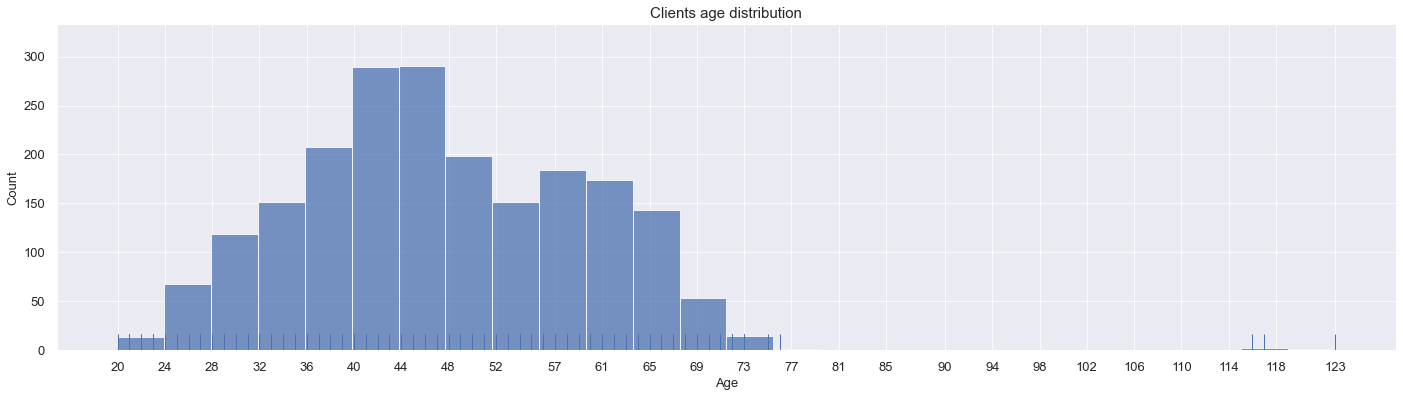

In [16]:
plt.figure(figsize=(24, 6))
plt.title('Clients age distribution')
ax = sns.histplot(data['Age'].sort_values(), bins=26)
sns.rugplot(data=data['Age'], height=.05)
plt.xticks(np.linspace(data['Age'].min(), data['Age'].max(), 26, dtype=int, endpoint = True))
plt.show()

There are really old customers ._.

I think they are missclicked or something while entering year of birth. Everything else looks okay, so i will drop them out while training the model, but will include them in the dataset to predict

In [17]:
data.query('Age > 110')

Year_Birth  Age  CustomerFor Education Marital_Status   Income  \
ID                                                                      
7829         1900  116         1168  2n Cycle       Divorced  36640.0   
11004        1893  123          935  2n Cycle         Single  60182.0   
1150         1899  117         1168       PhD       Together  83532.0   

       Kidhome  Teenhome  Recency  MntWines  ...  NumCatalogPurchases  \
ID                                           ...                        
7829         1         0       99        15  ...                    1   
11004        0         1       23         8  ...                    0   
1150         0         0       36       755  ...                    6   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
ID                                                                        
7829                   2                  5             0             0   
11004                  2                  4             0             0   
1150                   4                  1             0             0   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
ID                                                                   
7829              0             0             0         1         0  
11004             0             0             0         0         0  
1150              1             0             0         0         0  

[3 rows x 27 columns]

## Income

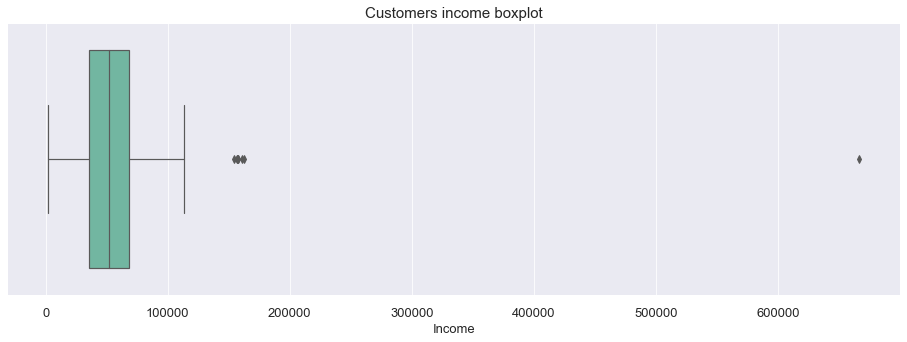

In [18]:
plt.figure(figsize=(16,5))
plt.title(f'Customers income boxplot')
ax = sns.boxplot(data['Income'], palette=PALETTE)
plt.show()

There are some outliers. Let's look on them.

In [19]:
data.query('Income > 140000')

Year_Birth  Age  CustomerFor   Education Marital_Status    Income  \
ID                                                                         
8475         1973   43         1069         PhD        Married  157243.0   
1503         1976   40         1372         PhD       Together  162397.0   
5555         1975   41          889  Graduation       Divorced  153924.0   
1501         1982   34         1704         PhD        Married  160803.0   
5336         1971   45         1341      Master       Together  157733.0   
4931         1977   39         1318  Graduation       Together  157146.0   
11181        1949   67         1196         PhD        Married  156924.0   
9432         1977   39         1400  Graduation       Together  666666.0   

       Kidhome  Teenhome  Recency  MntWines  ...  NumCatalogPurchases  \
ID                                           ...                        
8475         0         1       98        20  ...                   22   
1503         1         1       31        85  ...                    0   
5555         0         0       81         1  ...                    0   
1501         0         0       21        55  ...                   28   
5336         1         0       37        39  ...                    0   
4931         0         0       13         1  ...                   28   
11181        0         0       85         2  ...                    0   
9432         1         0       23         9  ...                    1   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
ID                                                                        
8475                   0                  0             0             0   
1503                   1                  1             0             0   
5555                   0                  0             0             0   
1501                   1                  0             0             0   
5336                   1                  1             0             0   
4931                   0                  1             0             0   
11181                  0                  0             0             0   
9432                   3                  6             0             0   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
ID                                                                   
8475              0             0             0         0         0  
1503              0             0             0         0         0  
5555              0             0             0         0         0  
1501              0             0             0         0         0  
5336              0             0             0         0         0  
4931              0             0             0         0         0  
11181             0             0             0         0         0  
9432              0             0             0         0         0  

[8 rows x 27 columns]

There is no reason to consider this data invalid. But while using clutering methods, outliers can negatively affect. I'll also drop these rows while training

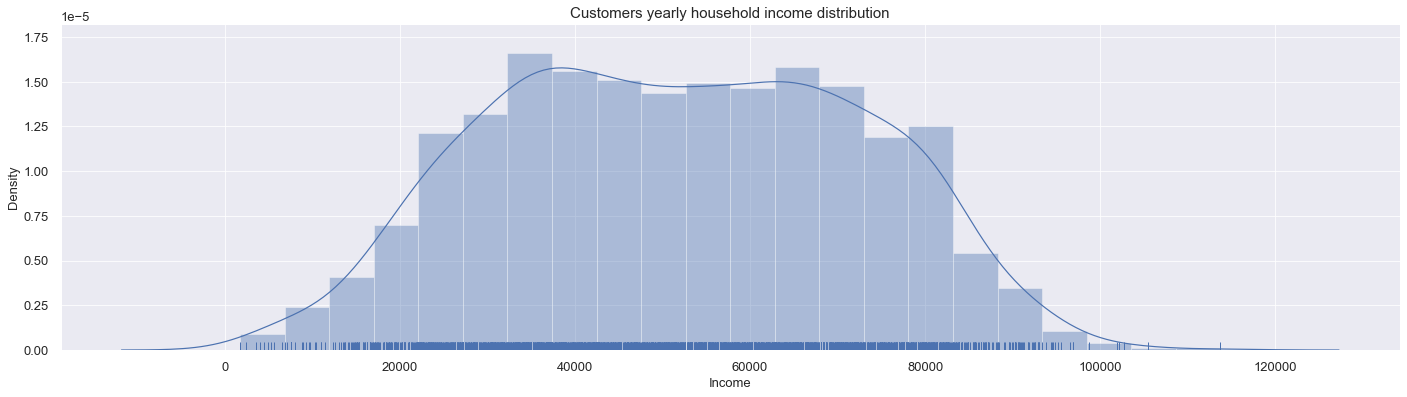

In [20]:
plt.figure(figsize=(24, 6))
plt.title('Customers yearly household income distribution')
ax = sns.distplot(data.query('Income < 150000')['Income'], rug=True)

plt.show()

__Filling nulls__

In [21]:
print(f'There are {data["Income"].isna().sum()} missing Income values')

There are 24 missing Income values


Let's impute this NaN's with median

In [22]:
data['Income'].fillna(data['Income'].median(), inplace=True)

## Education

In [23]:
data['Education'].value_counts()

Graduation    1030
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: Education, dtype: int64

`Graduation` and `2n Cycle` are not clear values. 

> All countries conveyed their national systems to a two cycle structure consisting of a first (undergraduate) and a second (graduate) cycle. _Source:_ [EHEA](http://www.ehea.info/page-three-cycle-system) 

According to three Cycle System from the European Higher Education Area, `2n Cycle` refers to `Master` degree. And `Graduation` means that the person is on the second - graduate cycle, so in fact he finished the first - undergraduate cycle (in many countries named `Bachelor`)

So the changes are as follow:
- `2n Cycle` -> `Master`
- `Graduation` -> `Bachelor`

In [24]:
data['Education'].replace(['2n Cycle', 'Graduation'], 
                          ['Master', 'Bachelor'], inplace=True)

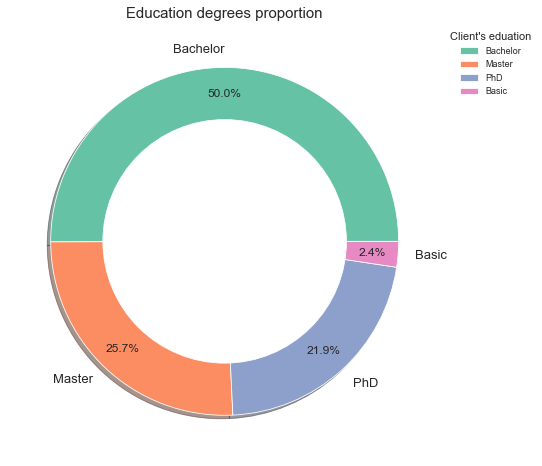

In [25]:
sizes = dict(data['Education'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Education degrees proportion")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Client's eduation", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Let's see how the Income varies across different education degrees

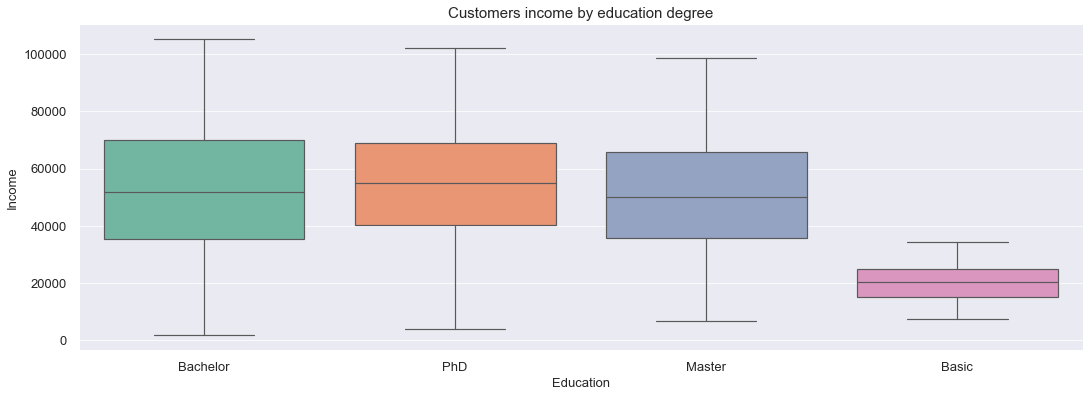

In [26]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=data.query('Income < 500000'), x='Education', y='Income', palette=PALETTE, showfliers=False,)
plt.title('Customers income by education degree')

plt.show()

Bachelor, PhD and Master degrees Income is around the same, but the Basic degree Income is definetly lower than others

## Marital status

In [27]:
data['Marital_Status'].value_counts()

Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

We can merge `Alone` to `Single` category, but `YOLO` and `Absurd` are not clear.

__YOLO__

> YOLO (You only live once) accords to the lifestyle or trend that many young people have adopted as a way to better enjoy life, and not to think about saving up for the future. 

I can assume that `YOLO` category refers to people who do not have a permanent partner, so i will merge it to `Single`

__Absurd__

> In philosophy, "the Absurd" refers to the conflict between the human tendency to seek inherent value and meaning in life, and the human inability to find these with any certainty.

I would also merge `Absurd` to `Single`

In [28]:
data['Marital_Status'].replace(['YOLO', 'Absurd', 'Alone'], 'Single', inplace=True)

Now let's look on the marital statuses proportions 

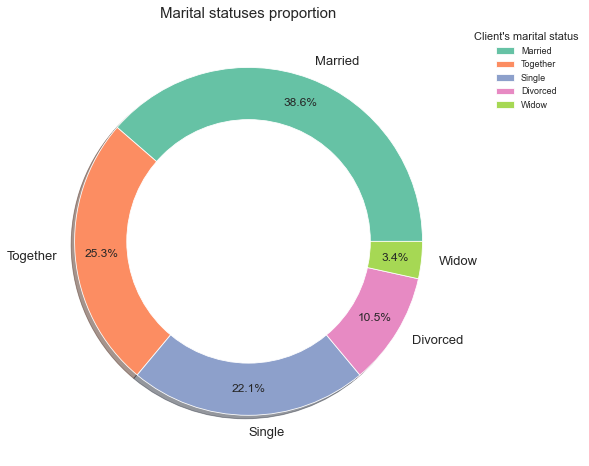

In [29]:
sizes = dict(data['Marital_Status'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Marital statuses proportion")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Client's marital status", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

I have an idea to combine the statuses [`Single`, `Widow`, `Divorced` ] and [`Together`, `Married`], because the client, as a consumer, is better described not by a specific status, but by the presence of a partner

In [30]:
data['HasPartner'] = data["Marital_Status"].replace({'Single': 'No', 
                                                      'Widow': 'No',
                                                      'Divorced': 'No',
                                                      'Together': 'Yes',
                                                      'Married': 'Yes'})

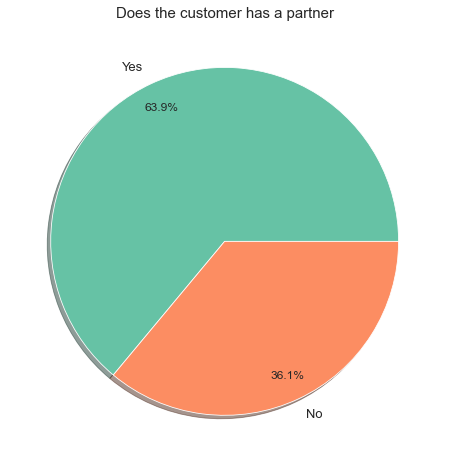

In [31]:
sizes = dict(data['HasPartner'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Does the customer has a partner")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)

plt.show()

So the most customers are in relationships

## Kidhome and Teenhome

In [32]:
data['Kidhome'].value_counts()

0    1184
1     831
2      43
Name: Kidhome, dtype: int64

In [33]:
data['Teenhome'].value_counts()

0    1060
1     948
2      50
Name: Teenhome, dtype: int64

I think the full number of children in the client's household can help us to better interpret the result of clustering

I would also introduce feature `HasChildren` which equals 1, if customer has one or more children, and equals 0 if customer doesn't have children

In [34]:
data['NumChildren'] = data['Kidhome'] + data['Teenhome']
data['HasChildren'] = (data['NumChildren'] >= 1).astype('int64')

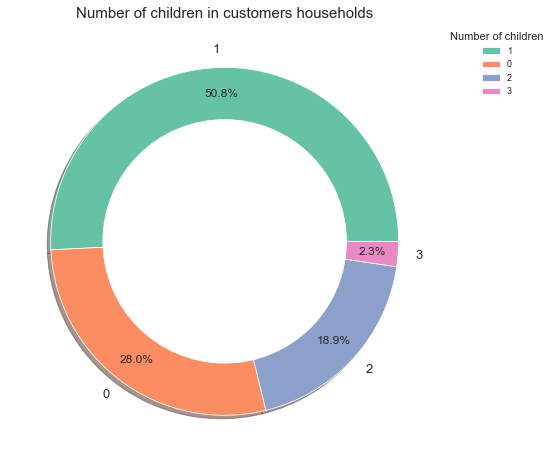

In [35]:
sizes = dict(data['NumChildren'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Number of children in customers households")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Number of children", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

We see that the most customers have 1 child

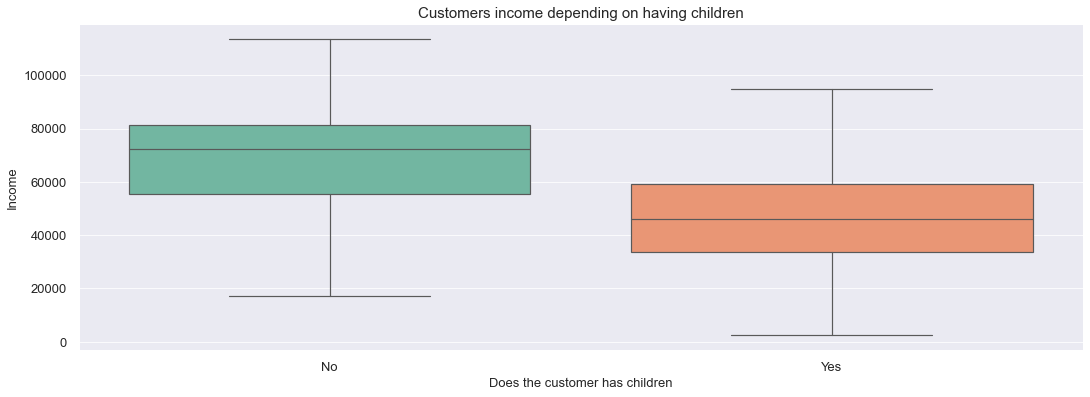

In [36]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=data.query('Income < 500000'), x='HasChildren', y='Income', palette=PALETTE, showfliers=False)
plt.title('Customers income depending on having children')
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Does the customer has children')

plt.show()

Customers without children have bigger income

## Amount spent

In [37]:
mnt = data.filter(like='Mnt').apply(lambda x: sum(x), axis=0)

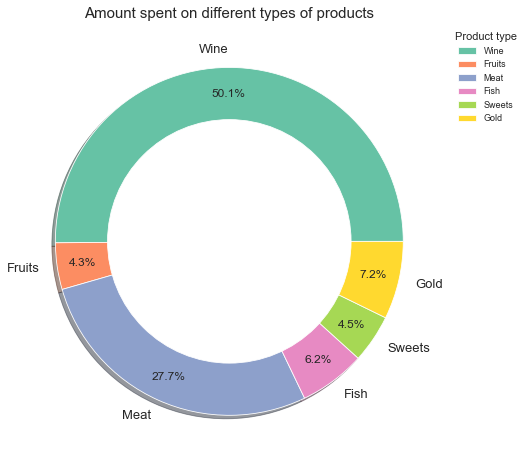

In [38]:
sizes = dict(mnt)

plt.figure(figsize=(12, 8))
plt.title("Amount spent on different types of products")
plt.pie(sizes.values(), labels=['Wine', 'Fruits', 'Meat',
                                'Fish', 'Sweets', 'Gold'], autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Product type", labels=['Wine', 'Fruits', 'Meat',
                                         'Fish', 'Sweets', 'Gold'], bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

`Wines` and `Meat` products are the most spent on

Let's introduce `MntTotal` feature, which is the total amount spent in the last 2 years

In [39]:
data['MntTotal'] = data.filter(like='Mnt').sum(axis=1)

And i will calculate the percent of amount spent on each product type from total amount spent for each customer

In [40]:
data = data.assign(
        percentWines=lambda x: x['MntWines'] / x['MntTotal'] * 100,
        percentMeat=lambda x: x['MntMeatProducts'] / x['MntTotal'] * 100,
        percentFruits=lambda x: x['MntFruits'] / x['MntTotal'] * 100,
        percentFish=lambda x: x['MntFishProducts'] / x['MntTotal'] * 100,
        percentSweets=lambda x: x['MntSweetProducts'] / x['MntTotal'] * 100,
        percentGold=lambda x: x['MntGoldProds'] / x['MntTotal'] * 100,
)

Let's analyze this features in terms of education

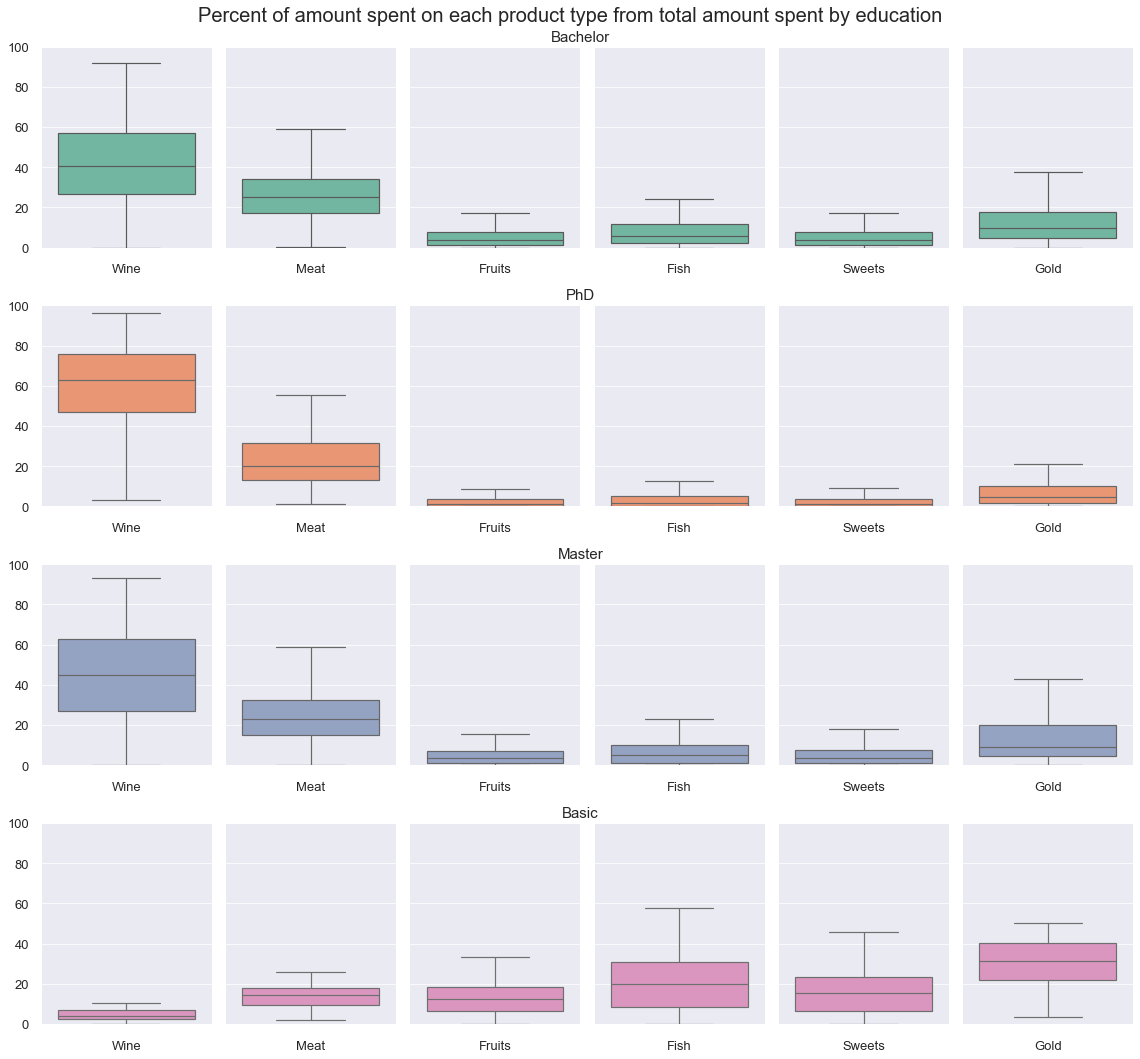

In [41]:
fig, axes = plt.subplots(4, 6, figsize=(16, 15), sharey=True)
fig.suptitle('Percent of amount spent on each product type from total amount spent by education', fontsize=20)

for i, value in enumerate(data['Education'].unique()):
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentWines', showfliers=False, color=PALETTE[i], ax=axes[i, 0])
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].set_xlabel('Wine')
    axes[i, 0].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentMeat', showfliers=False, color=PALETTE[i], ax=axes[i, 1])
    axes[i, 1].set_xlabel('Meat')
    axes[i, 1].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentFruits', showfliers=False, color=PALETTE[i], ax=axes[i, 2])
    axes[i, 2].set_xlabel('Fruits')
    axes[i, 2].set_ylabel('')
    axes[i, 2].set_title(f'{value}', x=1)
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentFish', showfliers=False, color=PALETTE[i], ax=axes[i, 3])
    axes[i, 3].set_xlabel('Fish')
    axes[i, 3].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentSweets', showfliers=False, color=PALETTE[i], ax=axes[i, 4])
    axes[i, 4].set_xlabel('Sweets')
    axes[i, 4].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentGold', showfliers=False, color=PALETTE[i], ax=axes[i, 5])
    axes[i, 5].set_xlabel('Gold')
    axes[i, 5].set_ylabel('')
    
plt.tight_layout()

Customers with PhD, Bachelor and Master degree mostly spend on Wine and Meat products. Also have to notice, that more than a half of PhD's spendings are Wine produts (in median)

And Basic degree customers spend more on Gold, Fish, Sweets

Now let's check the total amount spent depending on education degrees and number of children

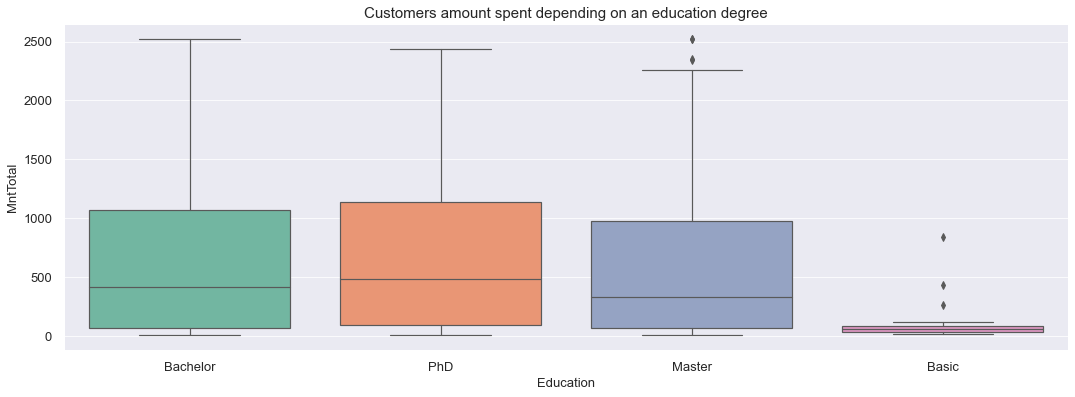

In [42]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=data, x='Education', y='MntTotal', palette=PALETTE)
plt.title('Customers amount spent depending on an education degree')

plt.show()

Customers with PhD degree spent the most amount in last 2 years, customers with Basic degree - the least amount. That corresponds to the `Income` distribution

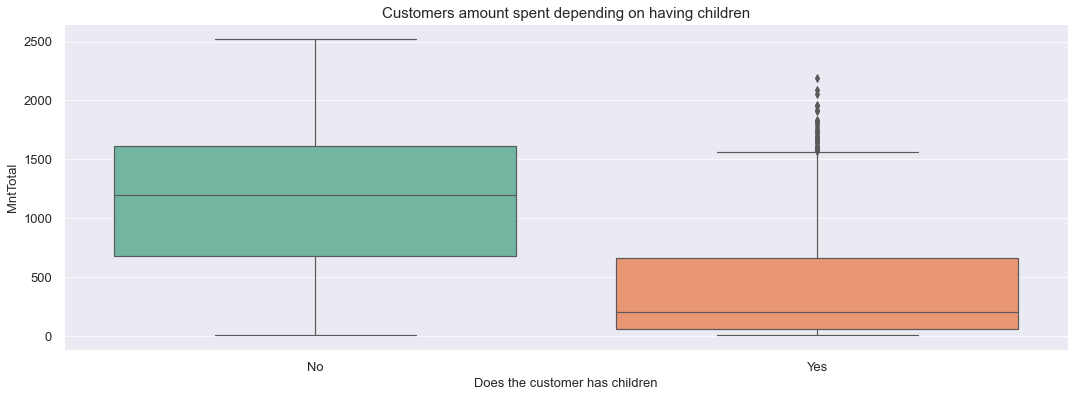

In [43]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=data, x='HasChildren', y='MntTotal', palette=PALETTE)
plt.title('Customers amount spent depending on having children')
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Does the customer has children')

plt.show()

And the amount spent by parents and not parents differs a lot

## Number of purchases

In [44]:
num = data.filter(regex='Num[^Deals].+Purchases').sum(axis=0)

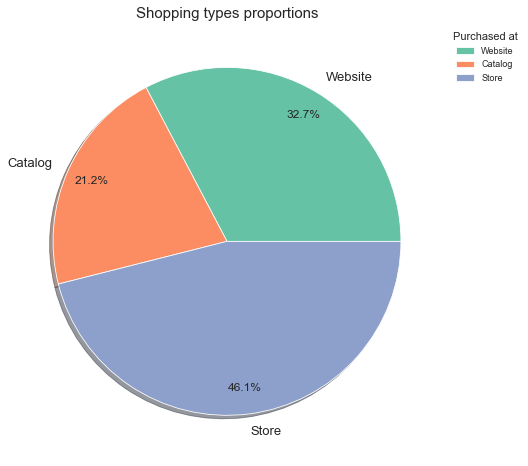

In [45]:
sizes = dict(num)

plt.figure(figsize=(12, 8))
plt.title("Shopping types proportions")
plt.pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Purchased at", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1))

plt.show()

The most purchases are from store

There is interesting insight that customers with `Basic` education degree have more website visits than others:

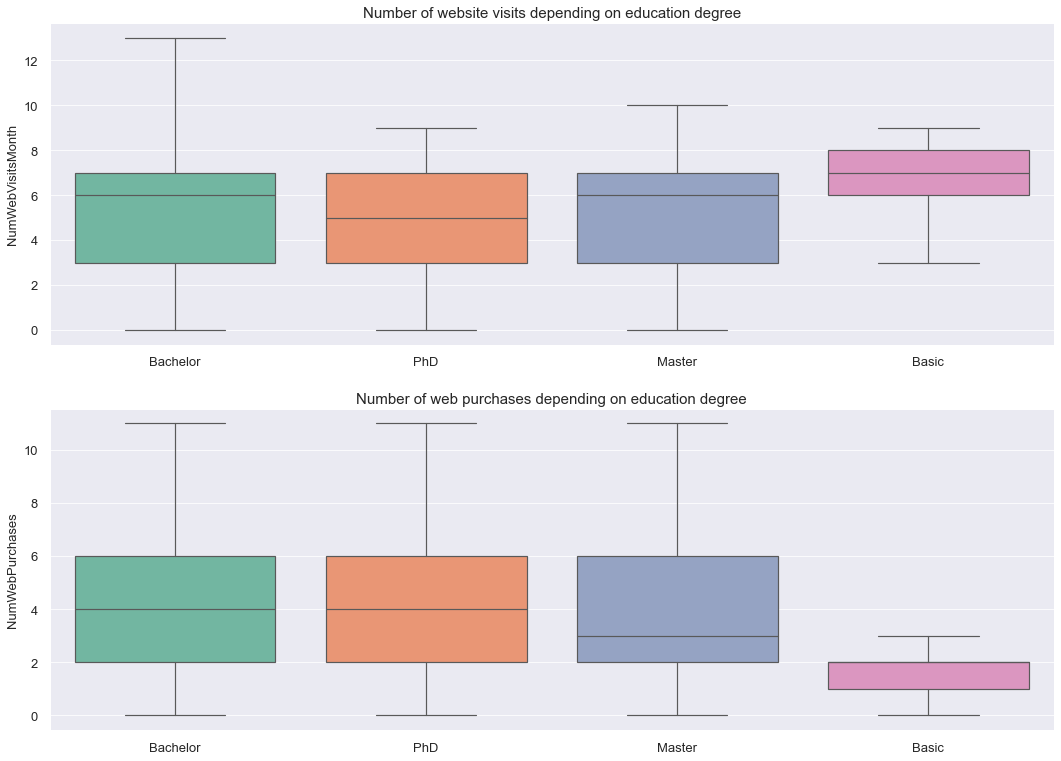

In [46]:
fig, axes= plt.subplots(2, 1, figsize=(18, 13))

sns.boxplot(data=data, x='Education', y='NumWebVisitsMonth', palette=PALETTE, showfliers=False, ax=axes[0])
axes[0].set_title('Number of website visits depending on education degree')
axes[0].set_xlabel('')

sns.boxplot(data=data, x='Education', y='NumWebPurchases', palette=PALETTE, showfliers=False, ax=axes[1])
axes[1].set_title('Number of web purchases depending on education degree')
axes[1].set_xlabel('')

plt.show()

Despite that, they do not buy more on the websites. The might just monitoring the deals. So the store could publish more deals on the site to force them buy more

Same thing with customers, that have children:

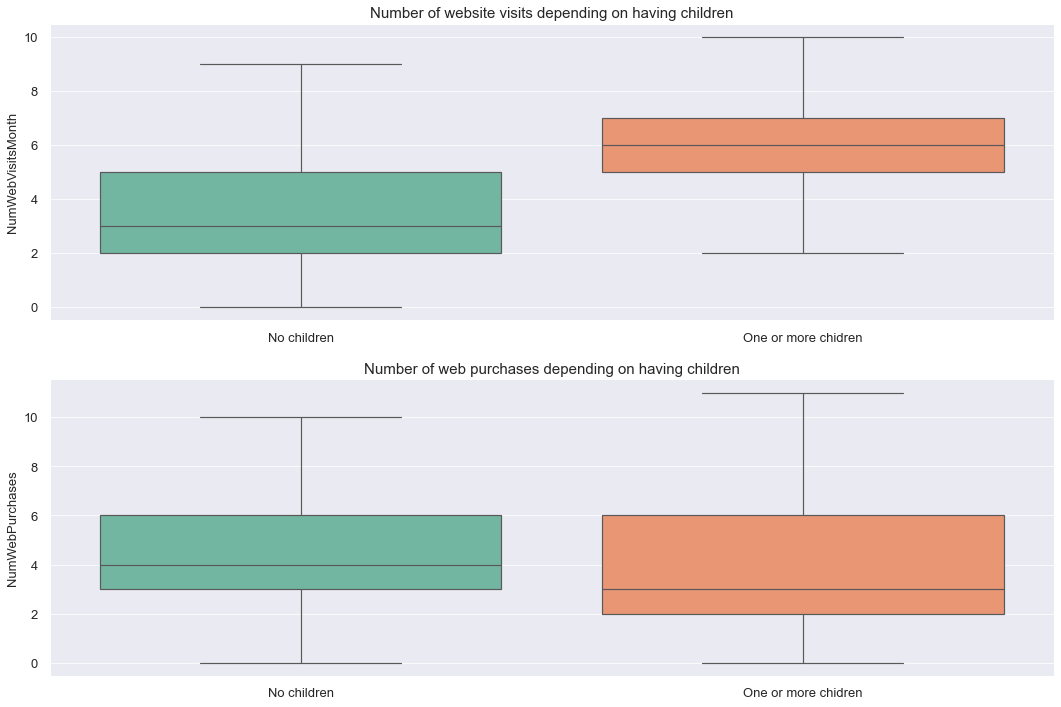

In [47]:
fig, axes= plt.subplots(2, 1, figsize=(18, 12))

sns.boxplot(data=data, x='HasChildren', y='NumWebVisitsMonth', palette=PALETTE, showfliers=False, ax=axes[0])
axes[0].set_title('Number of website visits depending on having children')
axes[0].set_xlabel('')
axes[0].set_xticklabels(['No children', 'One or more chidren'])

sns.boxplot(data=data, x='HasChildren', y='NumWebPurchases', palette=PALETTE, showfliers=False, ax=axes[1])
axes[1].set_title('Number of web purchases depending on having children')
axes[1].set_xlabel('')
axes[1].set_xticklabels(['No children', 'One or more chidren'])

plt.show()

In [48]:
data['NumTotalPurchases'] = data.filter(regex='Num[^Deals].+Purchases').sum(axis=1)

The feature `NumTotalPurchases` is the sum of all purchases made by a customer

In [49]:
data.loc[(data['NumTotalPurchases'] == 0) & (data['MntTotal'] != 0)]

Year_Birth  Age  CustomerFor Education Marital_Status    Income  \
ID                                                                       
5555         1975   41          889  Bachelor       Divorced  153924.0   
3955         1965   51          899  Bachelor       Divorced    4861.0   
6862         1971   45          934  Bachelor       Divorced    1730.0   
11110        1973   43         1334  Bachelor         Single    3502.0   
9931         1963   53          898       PhD        Married    4023.0   
11181        1949   67         1196       PhD        Married  156924.0   

       Kidhome  Teenhome  Recency  MntWines  ...  NumChildren  HasChildren  \
ID                                           ...                             
5555         0         0       81         1  ...            0            0   
3955         0         0       20         2  ...            0            0   
6862         0         0       65         1  ...            0            0   
11110        1         0       56         2  ...            1            1   
9931         1         1       29         5  ...            2            1   
11181        0         0       85         2  ...            0            0   

       MntTotal  percentWines  percentMeat  percentFruits  percentFish  \
ID                                                                       
5555          6     16.666667    16.666667      16.666667    16.666667   
3955          6     33.333333    16.666667      16.666667    16.666667   
6862          8     12.500000    37.500000      12.500000    12.500000   
11110         5     40.000000    20.000000      20.000000     0.000000   
9931          9     55.555556    11.111111       0.000000    11.111111   
11181         8     25.000000    25.000000      12.500000    12.500000   

       percentSweets  percentGold  NumTotalPurchases  
ID                                                    
5555       16.666667    16.666667                  0  
3955        0.000000    16.666667                  0  
6862       12.500000    12.500000                  0  
11110       0.000000    20.000000                  0  
9931       11.111111    11.111111                  0  
11181      12.500000    12.500000                  0  

[6 rows x 38 columns]

There are 6 customers with 0 purchases, but total amount spent is not 0. Seems like incorrectly collected data, let's delete these rows.

In [50]:
data.drop(data.loc[(data['NumTotalPurchases'] == 0) & (data['MntTotal'] != 0)].index, inplace=True)

Let's look on the correlation between `CustomerFor` and `NumTotalPurchases`

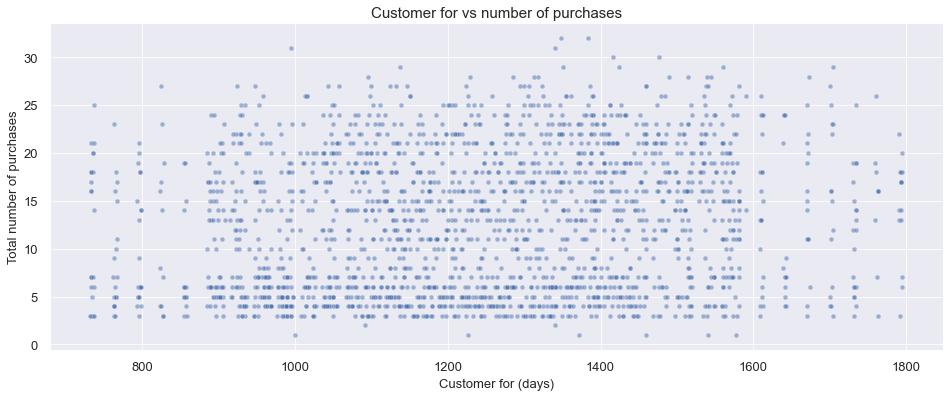

In [51]:
plt.figure(figsize=(16, 6))
plt.title('Customer for vs number of purchases')
sns.scatterplot(data=data, x='CustomerFor', y='NumTotalPurchases', alpha=0.5)
plt.xlabel('Customer for (days)')
plt.ylabel('Total number of purchases')
plt.show()

Seems like there is no correlation between `CustomerFor` and `NumTotalPurchases`. So i assume that information about number of purchases is also collected in the last 2 years, and we can evaluate customer's activity with `NumTotalPurchases`

`AvgCheck` is the average check of the customers purchases

In [52]:
data['AvgCheck'] = data['MntTotal'] / data['NumTotalPurchases']

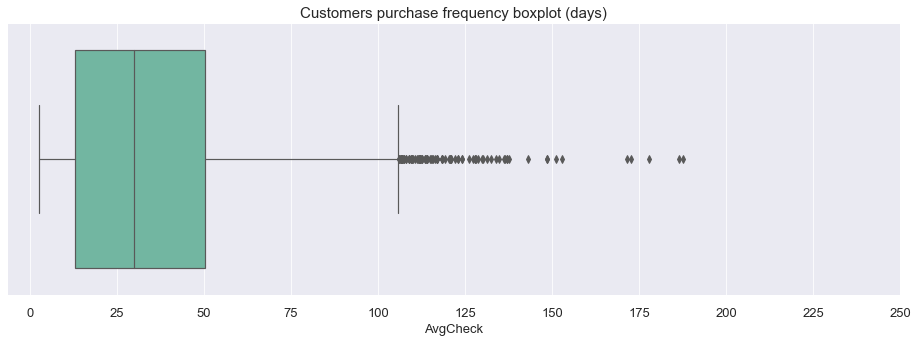

In [53]:
plt.figure(figsize=(16,5))
plt.title(f'Customers purchase frequency boxplot (days)')
ax = sns.boxplot(data.query('AvgCheck < 1600')['AvgCheck'], palette=PALETTE)
plt.xticks(np.linspace(0, 250, 11, dtype=int))
plt.show()

There is also one outlier with 1679 average check

In [54]:
data.query('AvgCheck > 1500')

Year_Birth  Age  CustomerFor Education Marital_Status   Income  Kidhome  \
ID                                                                              
8720        1978   38         1460    Master       Together  51533.0        0   

      Teenhome  Recency  MntWines  ...  HasChildren  MntTotal  percentWines  \
ID                                 ...                                        
8720         0       53        32  ...            0      1679      1.905896   

      percentMeat  percentFruits  percentFish  percentSweets  percentGold  \
ID                                                                          
8720    95.711733       0.119119     0.714711       0.238237     1.310304   

      NumTotalPurchases  AvgCheck  
ID                                 
8720                  1    1679.0  

[1 rows x 39 columns]

## Accepted campaigns

Let's add `AcceptedTotal` feature which is the number of accepted campaigns by customer

In [55]:
data['AcceptedTotal'] = data.filter(regex='Accepted|Response').sum(axis=1)

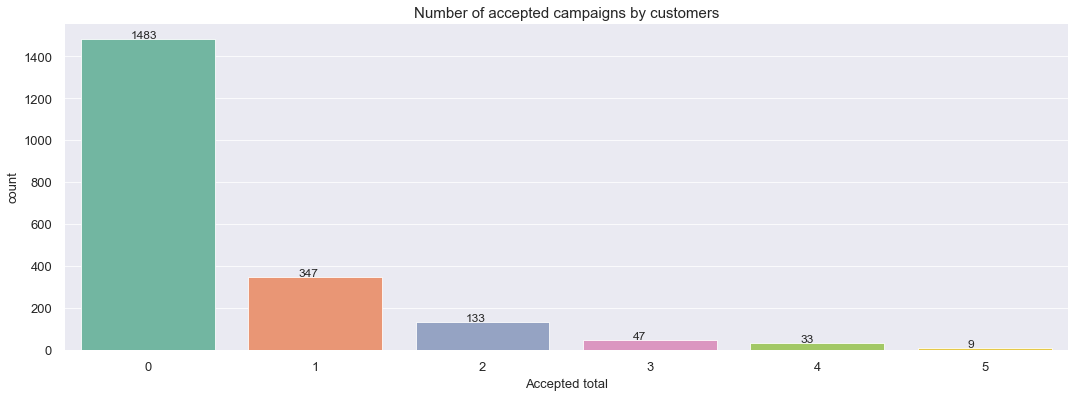

In [56]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(data['AcceptedTotal'], palette=PALETTE)

plt.title('Number of accepted campaigns by customers')
plt.xlabel('Accepted total')

# annotating the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.30, p.get_height()+3))

The majority of customers didn't accepted any campaign

In [57]:
total = data.groupby('AcceptedTotal').sum().reset_index()

In [58]:
total

AcceptedTotal  Year_Birth    Age  CustomerFor      Income  Kidhome  \
0              0     2919974  69754      1829783  72417505.0      750   
1              1      682659  16893       439732  19584933.0      122   
2              2      261850   6278       170055   8255826.0       38   
3              3       92683   2069        61138   3673928.0        3   
4              4       65082   1446        40620   2698811.0        2   
5              5       17720    424        10957    776573.0        0   

   Teenhome  Recency  MntWines  MntFruits  ...  HasChildren  MntTotal  \
0       820    75330    321642      33514  ...         1174    681390   
1       164    15791    148182      10814  ...          220    285270   
2        45     5328     80421       4840  ...           66    143835   
3        13     2047     37472       2558  ...           13     69530   
4         4     1526     29765       1898  ...            5     54393   
5         1      385      7976        362  ...            1     13183   

   percentWines   percentMeat  percentFruits   percentFish  percentSweets  \
0  65219.039141  37163.249189    7947.485706  11519.884753    8103.157796   
1  17288.823648   8563.345590    1312.328686   1907.139665    1501.385281   
2   6923.459559   3232.643823     529.176335    612.829615     471.188162   
3   2588.213200   1174.937038     164.250368    275.622428     171.170592   
4   1789.893794    966.999260     109.180101    116.017155     136.356585   
5    500.089620    238.869836      29.314826     38.708212      43.445296   

    percentGold  NumTotalPurchases      AvgCheck  
0  18347.183415              16824  45092.127532  
1   4126.977131               5089  18285.824019  
2   1530.702506               2102   8152.279449  
3    325.806374                906   3838.849095  
4    181.553106                682   2720.071416  
5     49.572211                184    691.765987  

[6 rows x 37 columns]

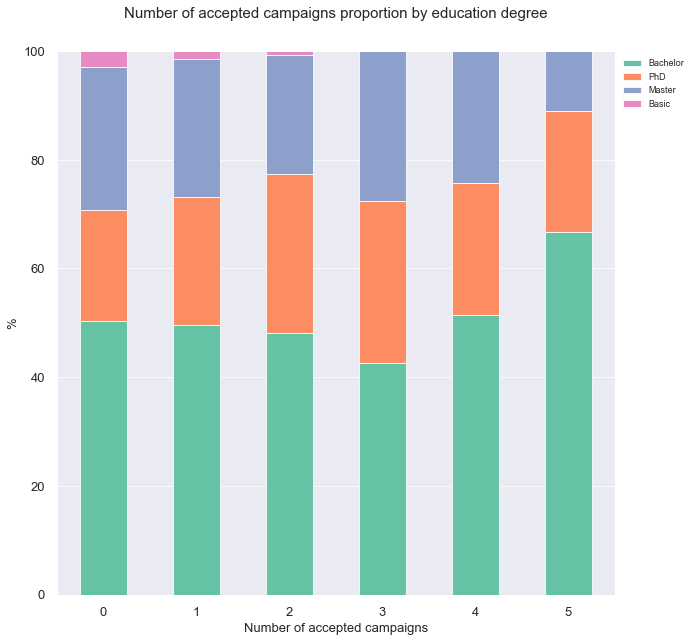

In [59]:
plt.figure(figsize=(10, 10))

accepted_data = pd.Series({i: 0 for i in range(6)})
tmp_data = accepted_data
for i, value in enumerate(data['Education'].unique()):
    tmp_data += accepted_data
    accepted_data = data.query(f'Education == "{value}"')['AcceptedTotal'].value_counts()
                                                                          .divide(data['AcceptedTotal'].value_counts())
                                                                          .multiply(100)
    ax = accepted_data.plot(kind='bar', bottom=tmp_data, color=PALETTE[i], label=f'{value}')

del tmp_data

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title('Number of accepted campaigns proportion by education degree', y=1.05)
plt.xlabel('Number of accepted campaigns')
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1,1))

plt.show()

Basic degree customers most offen do not accept campaigns, but there are someone who accepted 1 or 2 campaigns

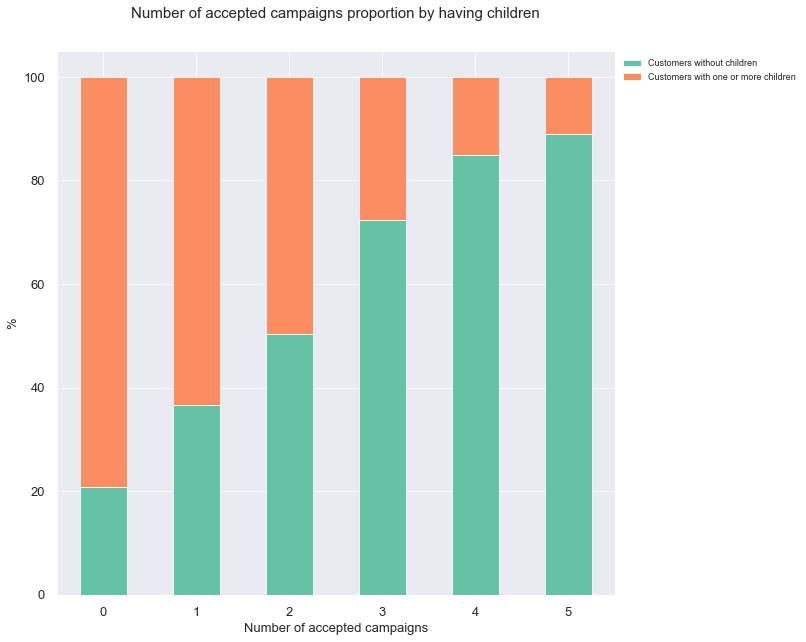

In [60]:
plt.figure(figsize=(10, 10))

accepted_data = pd.Series({i: 0 for i in range(6)})
tmp_data = accepted_data
for i, value in enumerate(data['HasChildren'].unique()):
    tmp_data += accepted_data
    accepted_data = data.query(f'HasChildren == {value}')['AcceptedTotal'].value_counts()
                                                                          .divide(data['AcceptedTotal'].value_counts())
                                                                          .multiply(100)
    ax = accepted_data.plot(kind='bar', bottom=tmp_data, color=PALETTE[i], label=f'{value}')

del tmp_data

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title('Number of accepted campaigns proportion by having children', y=1.05)
plt.xlabel('Number of accepted campaigns')
plt.ylabel('%')
plt.legend(['Customers without children', 'Customers with one or more children'], bbox_to_anchor=(1,1))

plt.show()

This graph illustrates us that the more campaigns was accepted by customers, the more likely it would be customer without children

## Data Cleaning

In [61]:
data_cleaned = data.drop(data[(data['Income'] > 140000) |
                              (data['Age'] > 100) |
                              (data['AvgCheck'] > 150)].index)

In [62]:
data_cleaned

Year_Birth  Age  CustomerFor Education Marital_Status   Income  \
ID                                                                      
5524         1957   59         1703  Bachelor         Single  58138.0   
2174         1954   62          857  Bachelor         Single  46344.0   
4141         1965   51         1204  Bachelor       Together  71613.0   
6182         1984   32          797  Bachelor       Together  26646.0   
5324         1981   35         1053       PhD        Married  58293.0   
...           ...  ...          ...       ...            ...      ...   
8080         1986   30         1573  Bachelor         Single  26816.0   
10870        1967   49         1273  Bachelor        Married  61223.0   
7270         1981   35         1047  Bachelor       Divorced  56981.0   
8235         1956   60         1048    Master       Together  69245.0   
9405         1954   62         1514       PhD        Married  52869.0   

       Kidhome  Teenhome  Recency  MntWines  ...  MntTotal  percentWines  \
ID                                           ...                           
5524         0         0       58       635  ...      1617     39.270254   
2174         1         1       38        11  ...        27     40.740741   
4141         0         0       26       426  ...       776     54.896907   
6182         1         0       26        11  ...        53     20.754717   
5324         1         0       94       173  ...       422     40.995261   
...        ...       ...      ...       ...  ...       ...           ...   
8080         0         0       50         5  ...        22     22.727273   
10870        0         1       46       709  ...      1341     52.870992   
7270         0         0       91       908  ...      1241     73.166801   
8235         0         1        8       428  ...       843     50.771056   
9405         1         1       40        84  ...       172     48.837209   

       percentMeat  percentFruits  percentFish  percentSweets  percentGold  \
ID                                                                           
5524     33.766234       5.442177    10.636982       5.442177     5.442177   
2174     22.222222       3.703704     7.407407       3.703704    22.222222   
4141     16.365979       6.314433    14.304124       2.706186     5.412371   
6182     37.735849       7.547170    18.867925       5.660377     9.433962   
5324     27.962085      10.189573    10.900474       6.398104     3.554502   
...            ...            ...          ...            ...          ...   
8080     27.272727       4.545455    13.636364      18.181818    13.636364   
10870    13.571961       3.206562     3.131991       8.799403    18.419090   
7270     17.485898       3.867849     2.578566       0.966962     1.933924   
8235     25.385528       3.558719     9.489917       3.558719     7.236062   
9405     35.465116       1.744186     1.162791       0.581395    12.209302   

       NumTotalPurchases   AvgCheck  AcceptedTotal  
ID                                                  
5524                  22  73.500000              1  
2174                   4   6.750000              0  
4141                  20  38.800000              0  
6182                   6   8.833333              0  
5324                  14  30.142857              0  
...                  ...        ...            ...  
8080                   3   7.333333              0  
10870                 16  83.812500              0  
7270                  18  68.944444              1  
8235                  21  40.142857              0  
9405                   8  21.500000              1  

[2035 rows x 40 columns]

## Multivariate analysis

In [63]:
NUMERICAL_FEATURES = ['Age', 'Income', 'NumChildren', 'CustomerFor', 
                      'Recency', 'MntWines', 'MntTotal', 
                      'NumTotalPurchases', 'AcceptedTotal', 'AvgCheck']

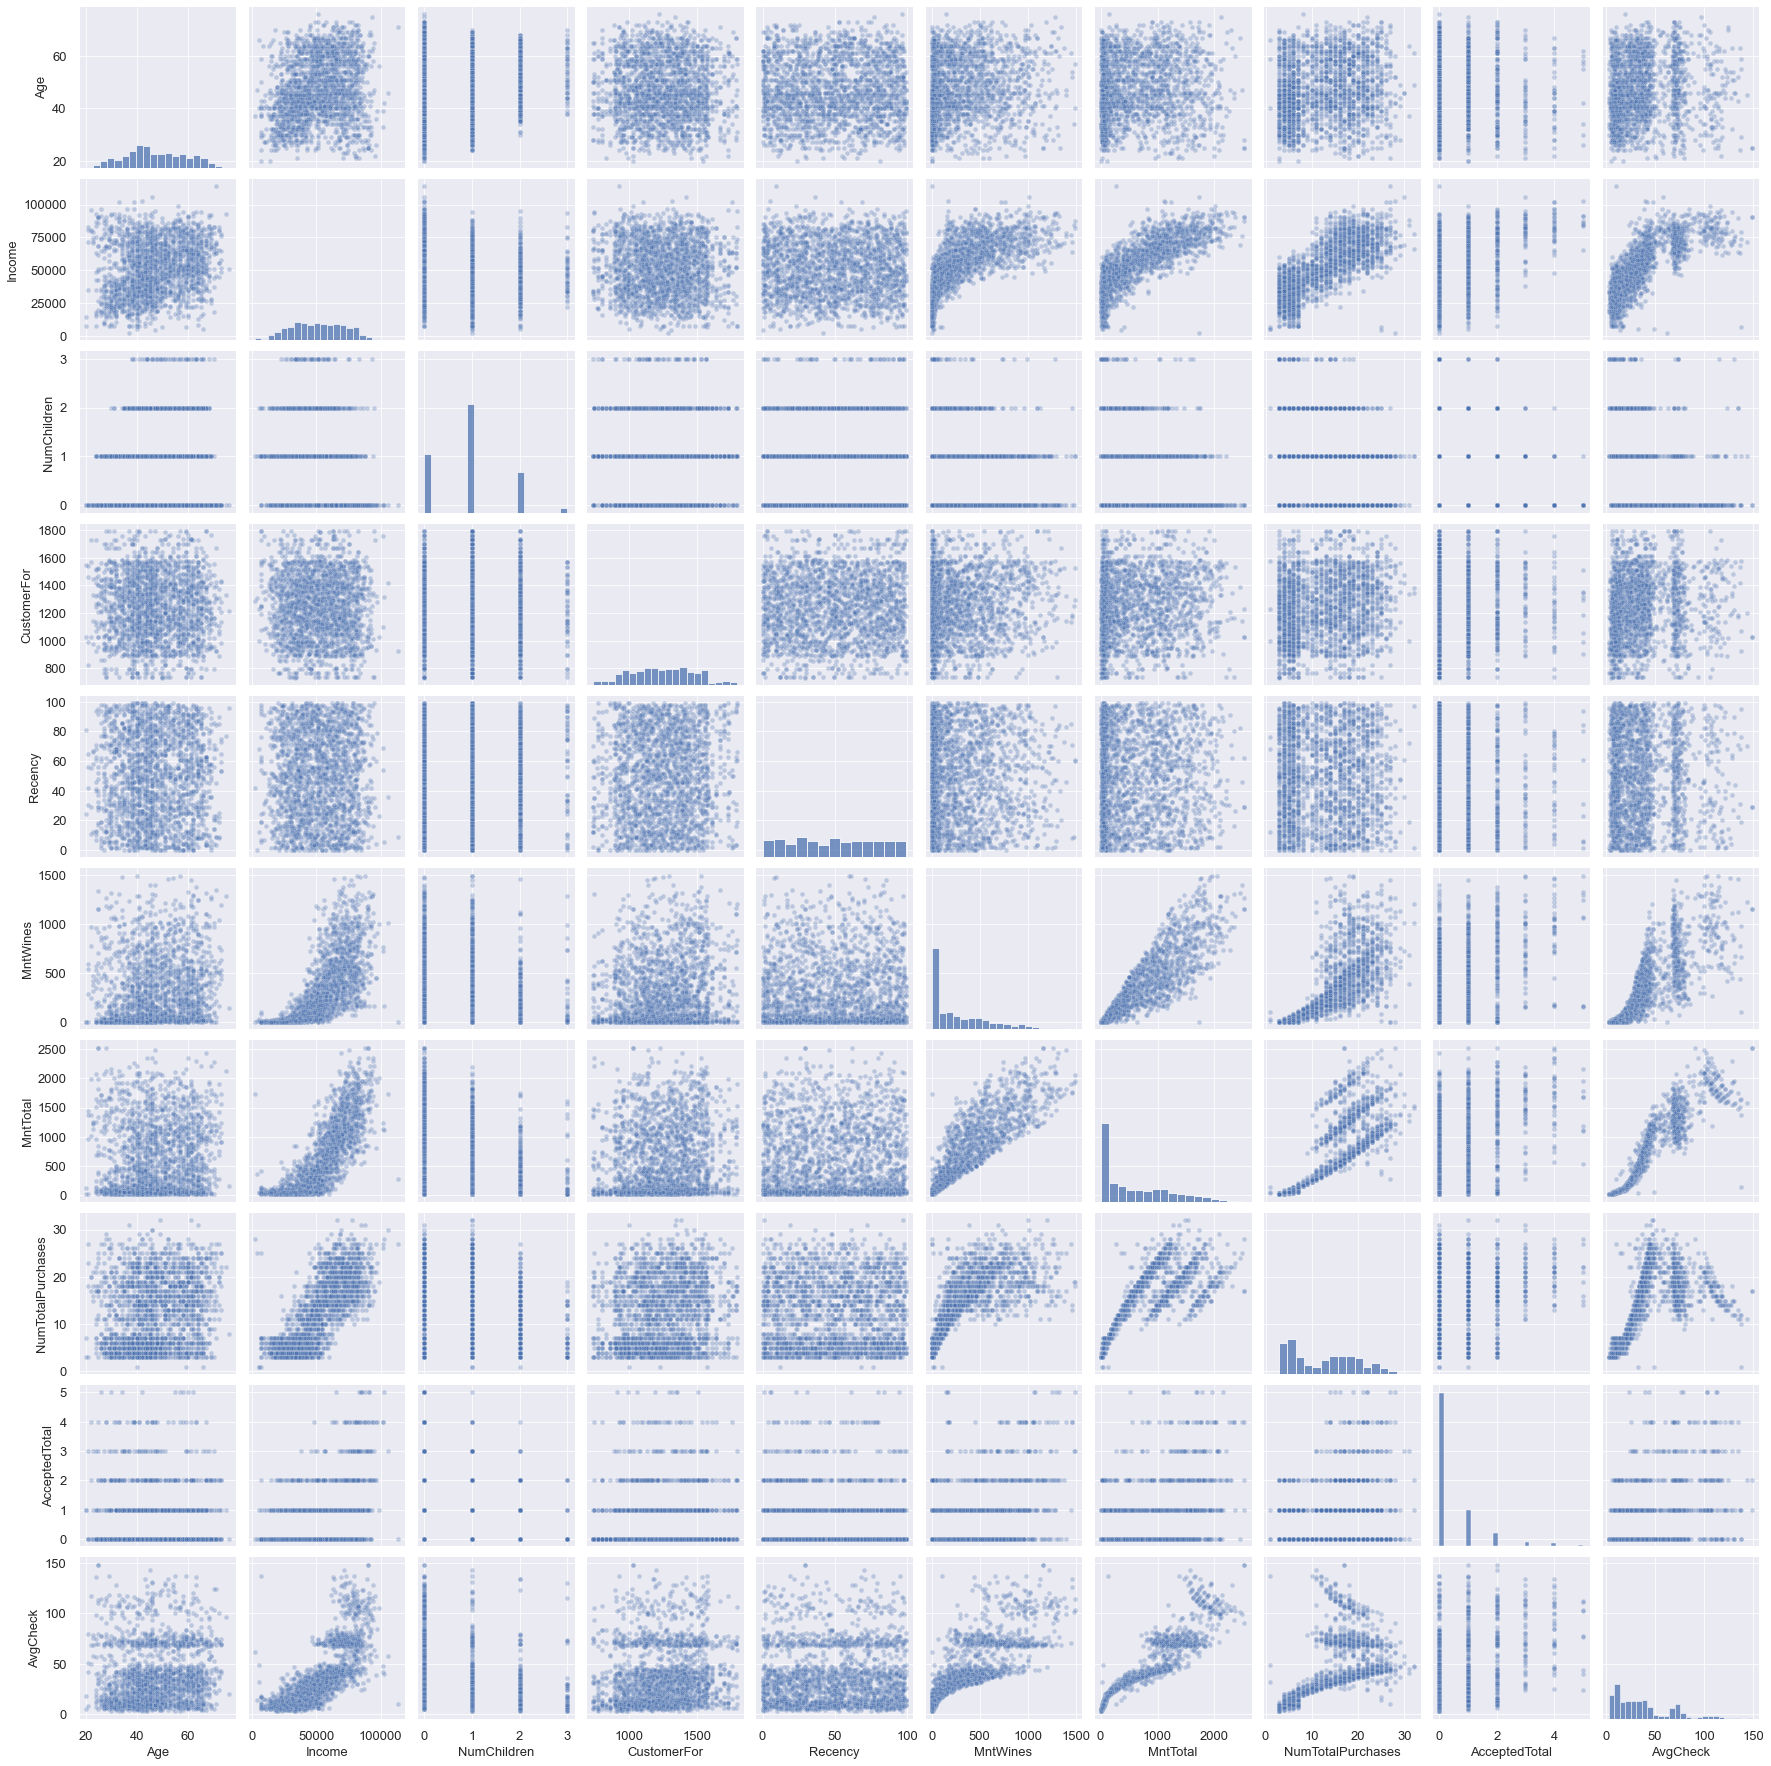

In [64]:
sns.pairplot(data=data_cleaned[NUMERICAL_FEATURES], 
             kind='scatter', plot_kws={'alpha':0.3})
plt.show()

We can see different areas of objects on some scatterplots. `MntTotal` and `NumTotalPurchases`, for instance, or `AvgCheck` and `Age`

That happens, because `NumTotalPurchases` has bimodal distribution. And `AvgCheck` calculates depending on `NumTotalPurchases` 

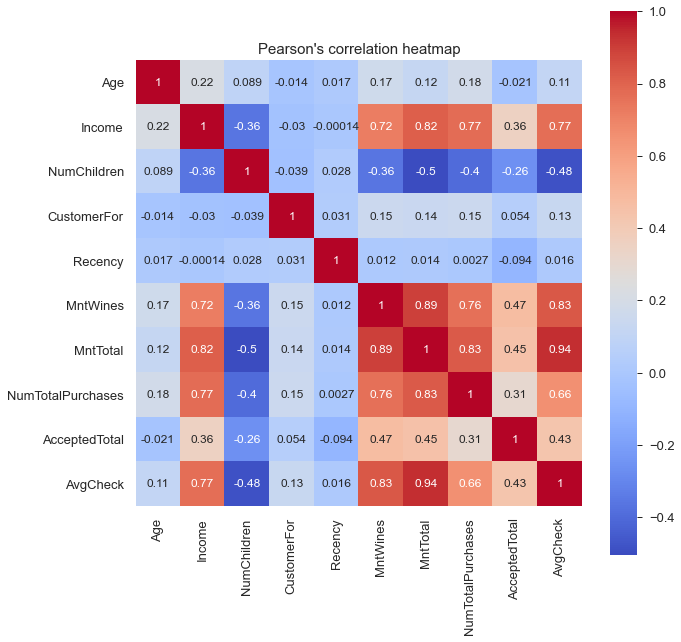

In [67]:
corr_matr = data_cleaned[NUMERICAL_FEATURES].corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', square=True)
plt.title("Pearson's correlation heatmap")
plt.show()

All correlations are clear and explainable

# Data preprocessing

## Feature scaling

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 5524 to 9405
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2052 non-null   int64  
 1   Age                  2052 non-null   int64  
 2   CustomerFor          2052 non-null   int64  
 3   Education            2052 non-null   object 
 4   Marital_Status       2052 non-null   object 
 5   Income               2052 non-null   float64
 6   Kidhome              2052 non-null   int64  
 7   Teenhome             2052 non-null   int64  
 8   Recency              2052 non-null   int64  
 9   MntWines             2052 non-null   int64  
 10  MntFruits            2052 non-null   int64  
 11  MntMeatProducts      2052 non-null   int64  
 12  MntFishProducts      2052 non-null   int64  
 13  MntSweetProducts     2052 non-null   int64  
 14  MntGoldProds         2052 non-null   int64  
 15  NumDealsPurchases    2052 non-null 

In [69]:
SELECTED_FEATURES = ['AvgCheck', 'Income', 'NumTotalPurchases', 'MntTotal']

In [70]:
scaler = gen_features(
    columns = [[c] for c in SELECTED_FEATURES],
    classes=[{'class': PowerTransformer, 'method': 'box-cox'}]
)

The features and scaling method was chosen by iterative process of evaluating different combinations by silhouette score

By the way, $Box-Cox$ transformation:

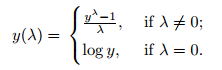

PowerTransformer automatically select lambda by estimating through maximum likelihood.

The feature selected are correlated, but i guess this is not really a problem in k means clustering ([source](https://www.quora.com/What-happens-when-you-pass-correlated-variables-to-a-k-means-clustering-Also-is-there-a-way-by-which-clustering-can-be-used-to-group-similar-pattern-observed-for-a-variable-over-time)). In addition to that, all other uncorrelated features are not really interesting to cluster by

In [72]:
scaling_mapper = DataFrameMapper(scaler, default=None, df_out=True)
data_cleaned_scaled = scaling_mapper.fit_transform(data_cleaned)
data_scaled = scaling_mapper.transform(data)

In [73]:
data_cleaned_scaled

AvgCheck    Income  NumTotalPurchases  MntTotal Year_Birth Age  \
ID                                                                      
5524   1.217130  0.340014           1.215416  1.321052       1957  59   
2174  -1.529942 -0.229412          -1.348257 -1.452185       1954  62   
4141   0.399683  0.968542           1.024133  0.661824       1965  51   
6182  -1.260010 -1.238166          -0.879737 -1.123894       1984  32   
5324   0.094285  0.347367           0.366777  0.177483       1981  35   
...         ...       ...                ...       ...        ...  ..   
8080  -1.447733 -1.229040          -1.639490 -1.544204       1986  30   
10870  1.393403  0.485787           0.602499  1.144608       1967  49   
7270   1.132274  0.285028           0.820591  1.073275       1981  35   
8235   0.441585  0.859557           1.121186  0.731884       1956  60   
9405  -0.299587  0.088141          -0.500678 -0.445691       1954  62   

      CustomerFor Education Marital_Status Kidhome  ... HasPartner  \
ID                                                  ...              
5524         1703  Bachelor         Single       0  ...         No   
2174          857  Bachelor         Single       1  ...         No   
4141         1204  Bachelor       Together       0  ...        Yes   
6182          797  Bachelor       Together       1  ...        Yes   
5324         1053       PhD        Married       1  ...        Yes   
...           ...       ...            ...     ...  ...        ...   
8080         1573  Bachelor         Single       0  ...         No   
10870        1273  Bachelor        Married       0  ...        Yes   
7270         1047  Bachelor       Divorced       0  ...         No   
8235         1048    Master       Together       0  ...        Yes   
9405         1514       PhD        Married       1  ...        Yes   

      NumChildren HasChildren percentWines percentMeat percentFruits  \
ID                                                                     
5524            0           0    39.270254   33.766234      5.442177   
2174            2           1    40.740741   22.222222      3.703704   
4141            0           0    54.896907   16.365979      6.314433   
6182            1           1    20.754717   37.735849       7.54717   
5324            1           1    40.995261   27.962085     10.189573   
...           ...         ...          ...         ...           ...   
8080            0           0    22.727273   27.272727      4.545455   
10870           1           1    52.870992   13.571961      3.206562   
7270            0           0    73.166801   17.485898      3.867849   
8235            1           1    50.771056   25.385528      3.558719   
9405            2           1    48.837209   35.465116      1.744186   

      percentFish percentSweets percentGold AcceptedTotal  
ID                                                         
5524    10.636982      5.442177    5.442177             1  
2174     7.407407      3.703704   22.222222             0  
4141    14.304124      2.706186    5.412371             0  
6182    18.867925      5.660377    9.433962             0  
5324    10.900474      6.398104    3.554502             0  
...           ...           ...         ...           ...  
8080    13.636364     18.181818   13.636364             0  
10870    3.131991      8.799403    18.41909             0  
7270     2.578566      0.966962    1.933924             1  
8235     9.489917      3.558719    7.236062             0  
9405     1.162791      0.581395   12.209302             1  

[2035 rows x 40 columns]

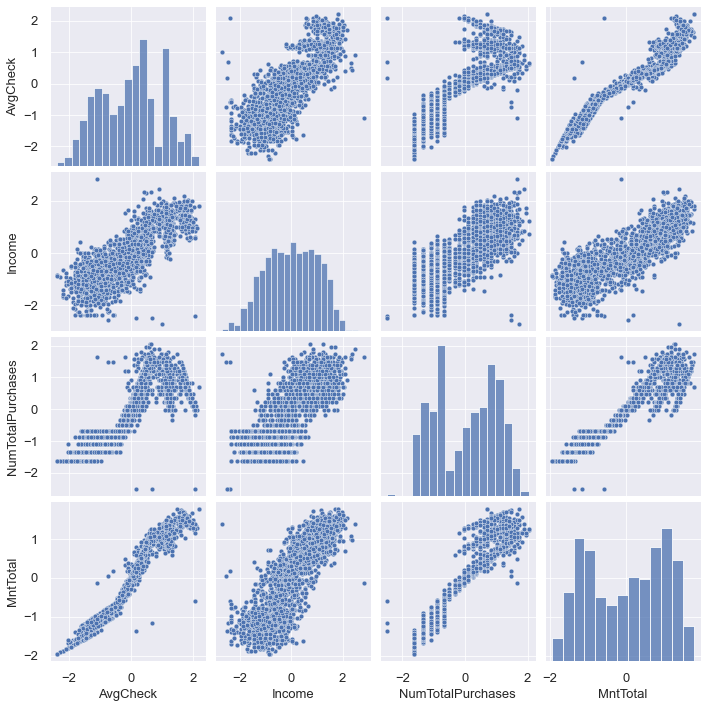

In [74]:
sns.pairplot(data=data_cleaned_scaled[SELECTED_FEATURES], 
             kind='scatter')
plt.show()

# Clustering

## K Means 

__Choosing the number of clusters__

I will use the elbow rule and silhouette score visualizasion for choosing the optimal number of clusters (k)

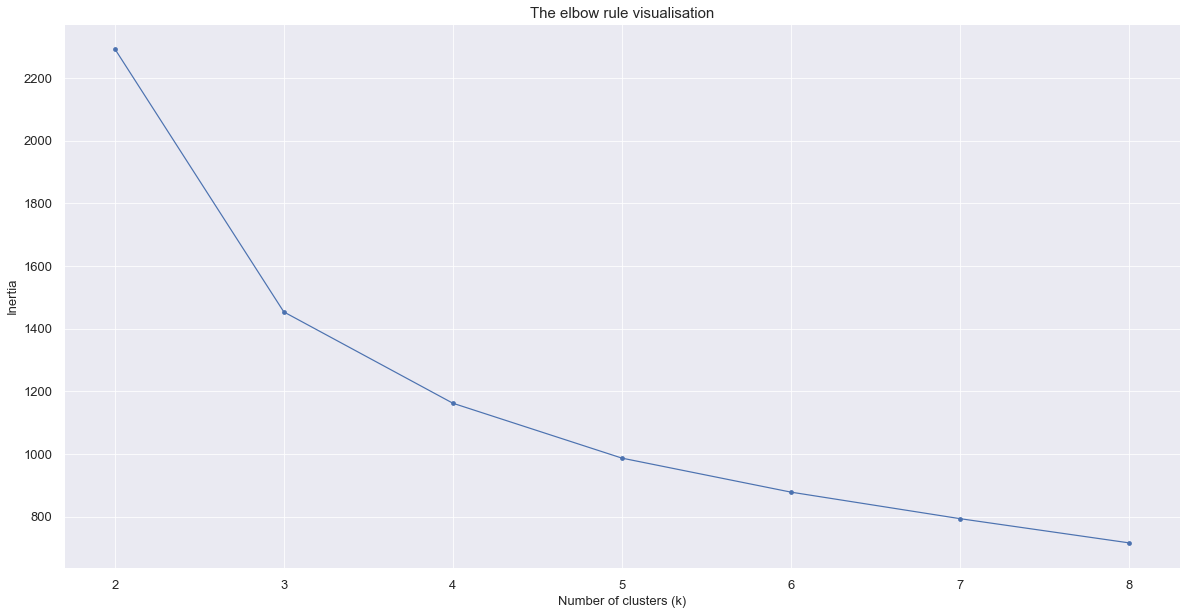

In [75]:
options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42, init='k-means++').fit(data_cleaned_scaled[SELECTED_FEATURES])
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("The elbow rule visualisation")
plt.plot(options, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia');

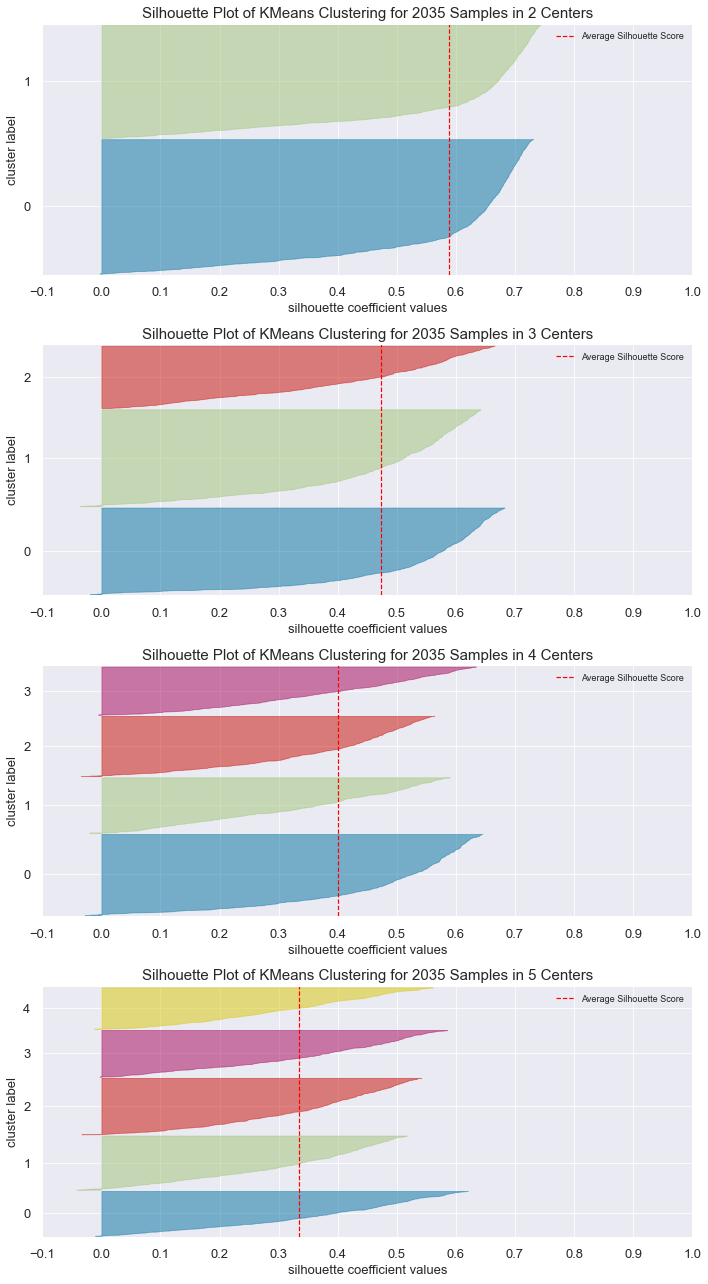

In [76]:
k_range = range(2, 6)
fig, axes = plt.subplots(4, 1, figsize=(10, 18))

for i in k_range:   
    model = KMeans(i, init='k-means++', n_init=100, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes[i-2])
    visualizer.fit(data_cleaned_scaled[SELECTED_FEATURES])
    visualizer.finalize()
    axes[i-2].set_xlim(-0.1, 1)
    
plt.tight_layout()


I think 4 is the optimal number of clusters. 

According to the elbow rule plot, 4 or 5 clusters could be optimal

Looking on the silhouette coefficient visualisation, 4 clusters provides relatively high silhouette scores for each cluster. 

In [77]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_cleaned_scaled[SELECTED_FEATURES])

pred = kmeans.predict(data_cleaned_scaled[SELECTED_FEATURES])

data_cleaned_clustered = data_cleaned.copy()
data_cleaned_clustered['Cluster'] = pred + 1

In [81]:
fig = px.scatter_3d(data_cleaned_clustered, x="Income", y="AvgCheck", z="MntTotal", color='Cluster', width=800, height=800)
fig.show()


__PCA visualisation__

In [82]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_cleaned_scaled[SELECTED_FEATURES])
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])
pca_df["Cluster"] = pred + 1

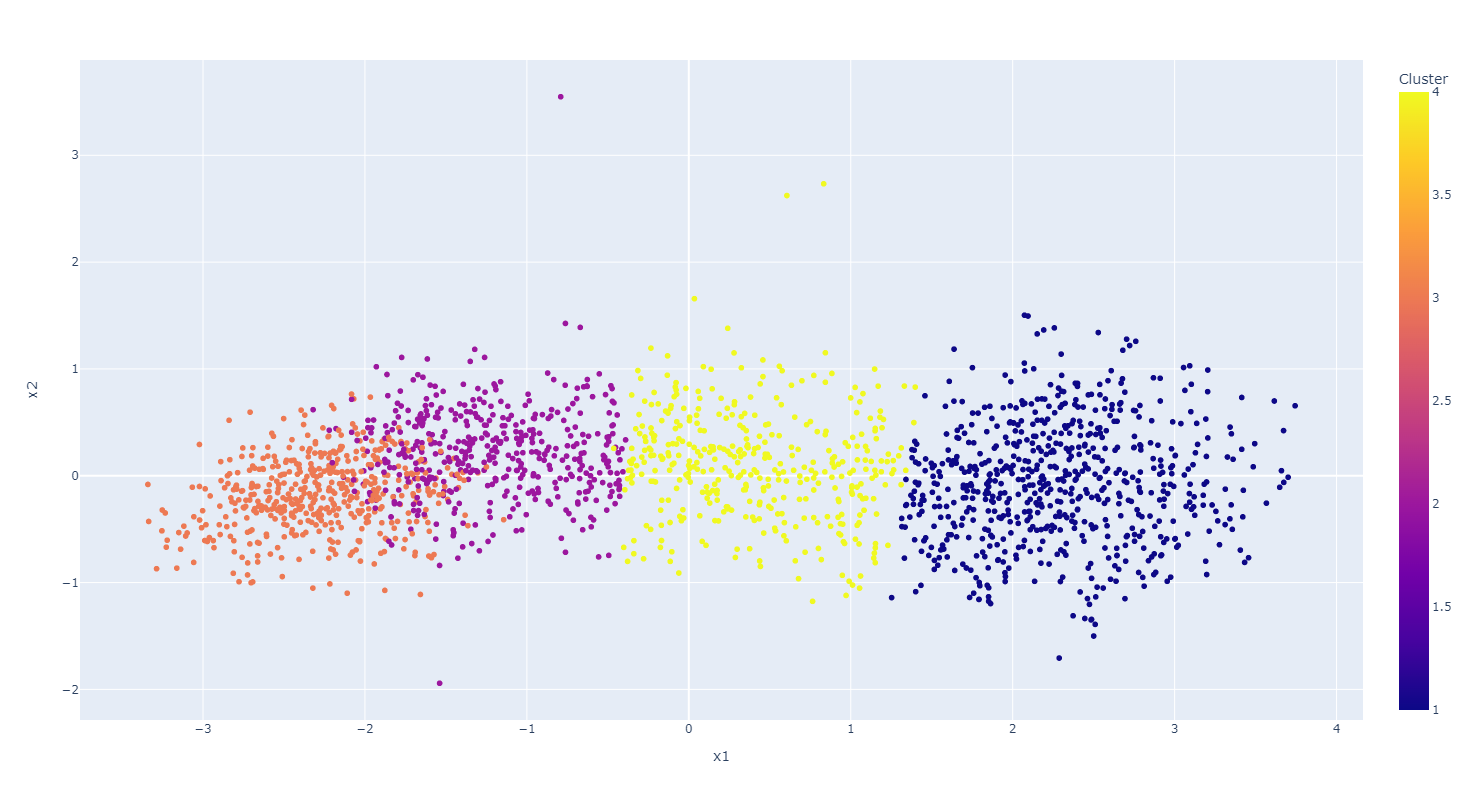

In [83]:
fig = px.scatter(pca_df, x="x1", y="x2", color='Cluster', width=800, height=800)
fig.show()

The model confuses cluster 2 and 3 a little, but that is not a big deal in general

PCA's eigenvectors explained variance:

In [84]:
pca.explained_variance_ratio_

array([0.89877585, 0.06084716])

In [85]:
pca.explained_variance_ratio_.sum()

0.959623005171494

One eigenvector explains around 90% of variance, and that is occured because of correlated variables

And now let's predict cluster labels on full dataset with outliers

In [86]:
full_preds = kmeans.predict(data_scaled[SELECTED_FEATURES])
data_clustered = data.copy()
data_clustered['Cluster'] = full_preds + 1

In [87]:
data_clustered

Year_Birth  Age  CustomerFor Education Marital_Status    Income  \
ID                                                                       
5524         1957   59         1703  Bachelor         Single   58138.0   
2174         1954   62          857  Bachelor         Single   46344.0   
4141         1965   51         1204  Bachelor       Together   71613.0   
6182         1984   32          797  Bachelor       Together   26646.0   
5324         1981   35         1053       PhD        Married   58293.0   
...           ...  ...          ...       ...            ...       ...   
9432         1977   39         1400  Bachelor       Together  666666.0   
10870        1967   49         1273  Bachelor        Married   61223.0   
7270         1981   35         1047  Bachelor       Divorced   56981.0   
8235         1956   60         1048    Master       Together   69245.0   
9405         1954   62         1514       PhD        Married   52869.0   

       Kidhome  Teenhome  Recency  MntWines  ...  percentWines  percentMeat  \
ID                                           ...                              
5524         0         0       58       635  ...     39.270254    33.766234   
2174         1         1       38        11  ...     40.740741    22.222222   
4141         0         0       26       426  ...     54.896907    16.365979   
6182         1         0       26        11  ...     20.754717    37.735849   
5324         1         0       94       173  ...     40.995261    27.962085   
...        ...       ...      ...       ...  ...           ...          ...   
9432         1         0       23         9  ...     14.516129    29.032258   
10870        0         1       46       709  ...     52.870992    13.571961   
7270         0         0       91       908  ...     73.166801    17.485898   
8235         0         1        8       428  ...     50.771056    25.385528   
9405         1         1       40        84  ...     48.837209    35.465116   

       percentFruits  percentFish  percentSweets  percentGold  \
ID                                                              
5524        5.442177    10.636982       5.442177     5.442177   
2174        3.703704     7.407407       3.703704    22.222222   
4141        6.314433    14.304124       2.706186     5.412371   
6182        7.547170    18.867925       5.660377     9.433962   
5324       10.189573    10.900474       6.398104     3.554502   
...              ...          ...            ...          ...   
9432       22.580645    12.903226       1.612903    19.354839   
10870       3.206562     3.131991       8.799403    18.419090   
7270        3.867849     2.578566       0.966962     1.933924   
8235        3.558719     9.489917       3.558719     7.236062   
9405        1.744186     1.162791       0.581395    12.209302   

       NumTotalPurchases   AvgCheck  AcceptedTotal  Cluster  
ID                                                           
5524                  22  73.500000              1        3  
2174                   4   6.750000              0        1  
4141                  20  38.800000              0        2  
6182                   6   8.833333              0        1  
5324                  14  30.142857              0        2  
...                  ...        ...            ...      ...  
9432                   7   8.857143              0        3  
10870                 16  83.812500              0        3  
7270                  18  68.944444              1        2  
8235                  21  40.142857              0        2  
9405                   8  21.500000              1        4  

[2052 rows x 41 columns]

# Clusters analysis

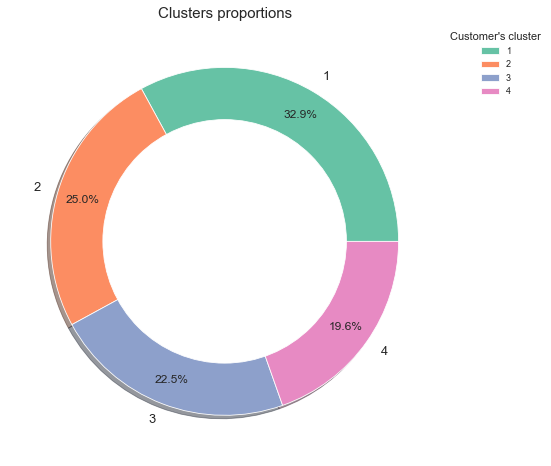

In [88]:
sizes = dict(data_clustered['Cluster'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Customer's cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Cluster 4 is the biggets cluster, around 1/3 of all customers. Clusters 1, 2 and 3 are around same sizes

## Income

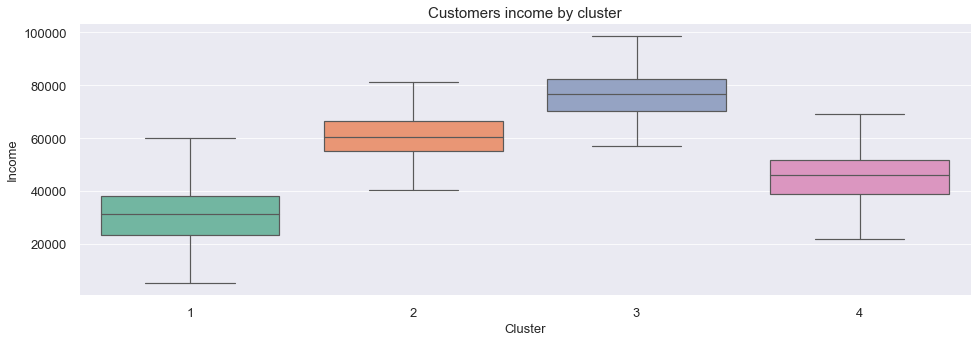

In [89]:
plt.figure(figsize=(16,5))
plt.title(f'Customers income by cluster')
ax = sns.boxplot(data=data_clustered, x='Cluster', y='Income', palette=PALETTE, showfliers=False)
plt.show()

Cluster 1: low income

Cluster 2: high income

Cluster 3: very high income

Cluster 4: medium income

In [90]:
data_clustered.query('Income > 140000')

Year_Birth  Age  CustomerFor Education Marital_Status    Income  \
ID                                                                      
8475        1973   43         1069       PhD        Married  157243.0   
1503        1976   40         1372       PhD       Together  162397.0   
1501        1982   34         1704       PhD        Married  160803.0   
5336        1971   45         1341    Master       Together  157733.0   
4931        1977   39         1318  Bachelor       Together  157146.0   
9432        1977   39         1400  Bachelor       Together  666666.0   

      Kidhome  Teenhome  Recency  MntWines  ...  percentWines  percentMeat  \
ID                                          ...                              
8475        0         1       98        20  ...      1.243781    98.383085   
1503        1         1       31        85  ...     79.439252    14.953271   
1501        0         0       21        55  ...      3.203262    94.467094   
5336        1         0       37        39  ...     66.101695    15.254237   
4931        0         0       13         1  ...      0.057803    99.710983   
9432        1         0       23         9  ...     14.516129    29.032258   

      percentFruits  percentFish  percentSweets  percentGold  \
ID                                                             
8475       0.124378     0.062189       0.124378     0.062189   
1503       0.934579     1.869159       0.934579     1.869159   
1501       0.931858     0.990099       0.174723     0.232964   
5336       1.694915     3.389831       0.000000    13.559322   
4931       0.000000     0.115607       0.057803     0.057803   
9432      22.580645    12.903226       1.612903    19.354839   

      NumTotalPurchases    AvgCheck  AcceptedTotal  Cluster  
ID                                                           
8475                 22   73.090909              0        3  
1503                  1  107.000000              0        3  
1501                 29   59.206897              0        3  
5336                  2   29.500000              0        3  
4931                 28   61.785714              0        3  
9432                  7    8.857143              0        3  

[6 rows x 41 columns]

And the income outliers are distributed in 3rd cluster

## Average check

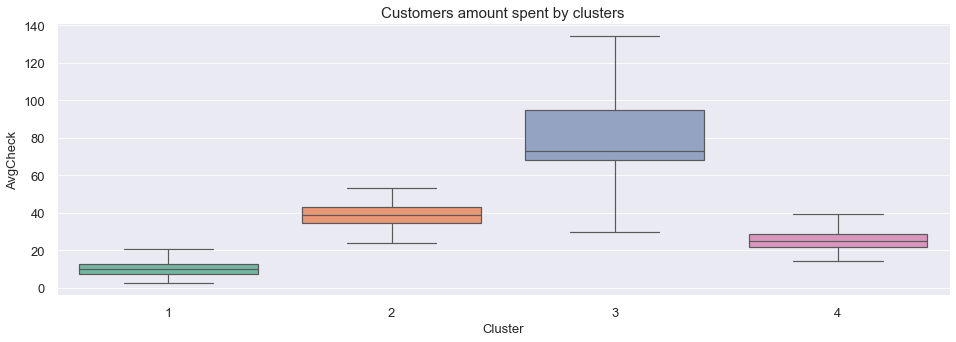

In [92]:
plt.figure(figsize=(16,5))
plt.title(f'Customers amount spent by clusters')
ax = sns.boxplot(data=data_clustered, x='Cluster', y='AvgCheck', palette=PALETTE, showfliers=False)
plt.show()

Average check corresponds to income of clusters, but the gap between 3rd cluster and others is huge

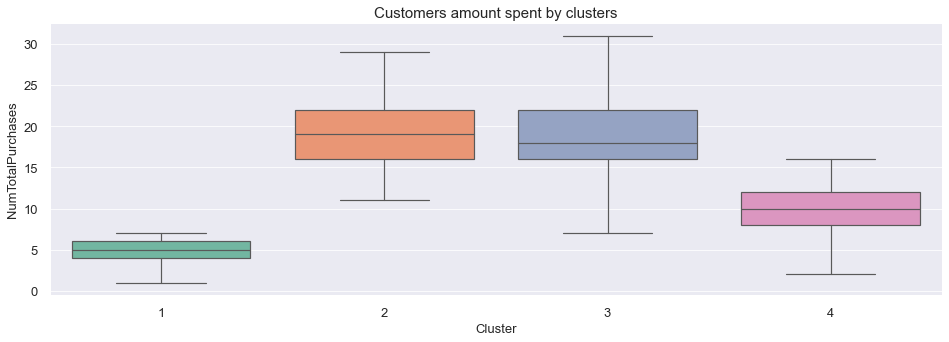

In [93]:
plt.figure(figsize=(16,5))
plt.title(f'Customers amount spent by clusters')
ax = sns.boxplot(data=data_clustered, x='Cluster', y='NumTotalPurchases', palette=PALETTE, showfliers=False)
plt.show()

Cluster 2 and 3 customers are the most active and frequent buyers, cluster 4 have medium frequency, and cluster 1 has low frequency of purchases

## Education

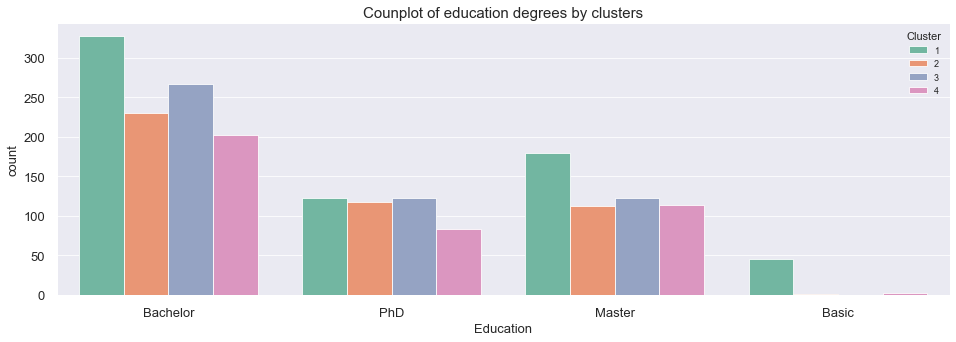

In [94]:
plt.figure(figsize=(16,5))
plt.title(f'Counplot of education degrees by clusters')
sns.countplot(data=data_clustered, x='Education', hue='Cluster', palette=PALETTE)
plt.show()

The Basic degree is presented in mostly in 1st cluster

## Children

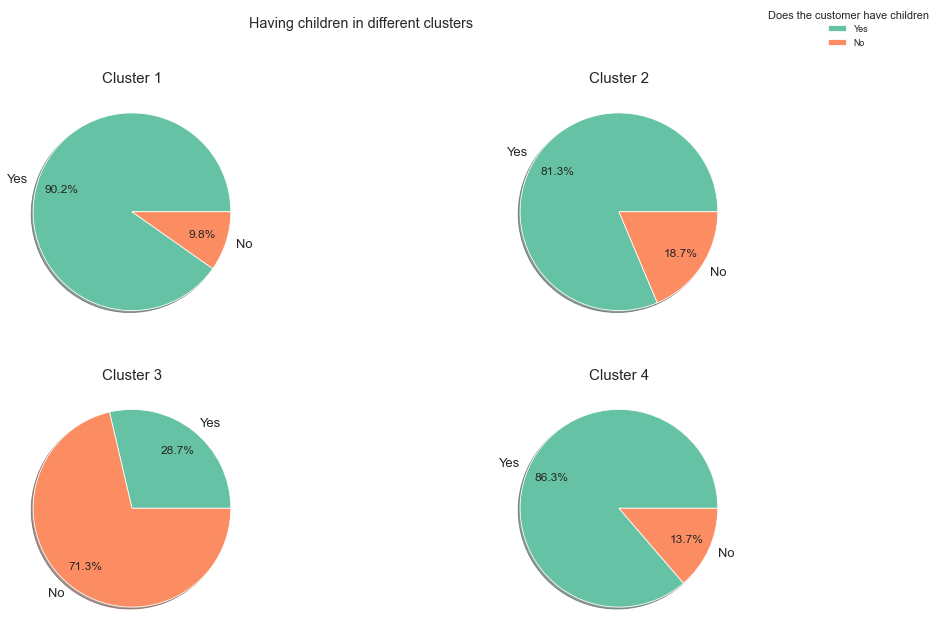

In [95]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        sizes = dict(data_clustered.query(f'Cluster == {k}')['HasChildren'].value_counts().sort_index(ascending=False))
        axes[i, j].set_title(f"Cluster {k}")
        axes[i, j].pie(sizes.values(), labels=['Yes', 'No'], autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=PALETTE)

fig.suptitle('Having children in different clusters')
fig.legend(title="Does the customer have children", labels=['Yes', 'No'], bbox_to_anchor=(1, 1)) 
fig.show()

There are mostly parents in 1, 2, 4 clusters. And customers in 3rd clusters are mostly single

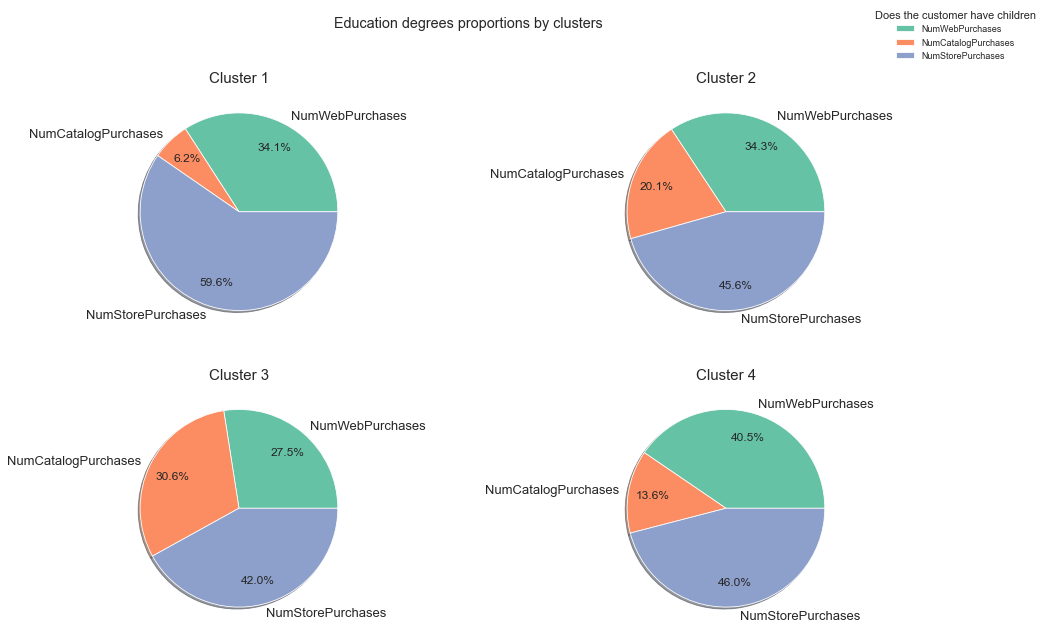

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        num = data_clustered.query(f'Cluster == {k}').filter(regex='Num[^Deals|Total].+Purchases').sum(axis=0)
        sizes = dict(num)
        axes[i, j].set_title(f"Cluster {k}")
        axes[i, j].pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=PALETTE)

fig.suptitle('Education degrees proportions by clusters')
fig.legend(title="Does the customer have children", labels=sizes.keys(), bbox_to_anchor=(1, 1)) 
fig.show()

Customers from 2nd and 3rd clusters buy from catalog more than from 1 and 4 clusters. Maybe catalog products are new products and they are pretty expensive

Now let's look on number of website visits by clusters

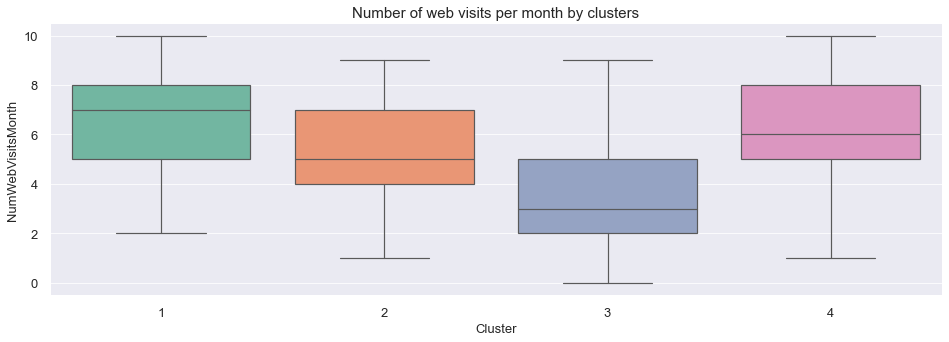

In [99]:
plt.figure(figsize=(16,5))
plt.title(f'Number of web visits per month by clusters')
ax = sns.boxplot(data=data_clustered, x='Cluster', y='NumWebVisitsMonth', palette=PALETTE, showfliers=False)
plt.show()

1st and 4th clusters visits the website the most

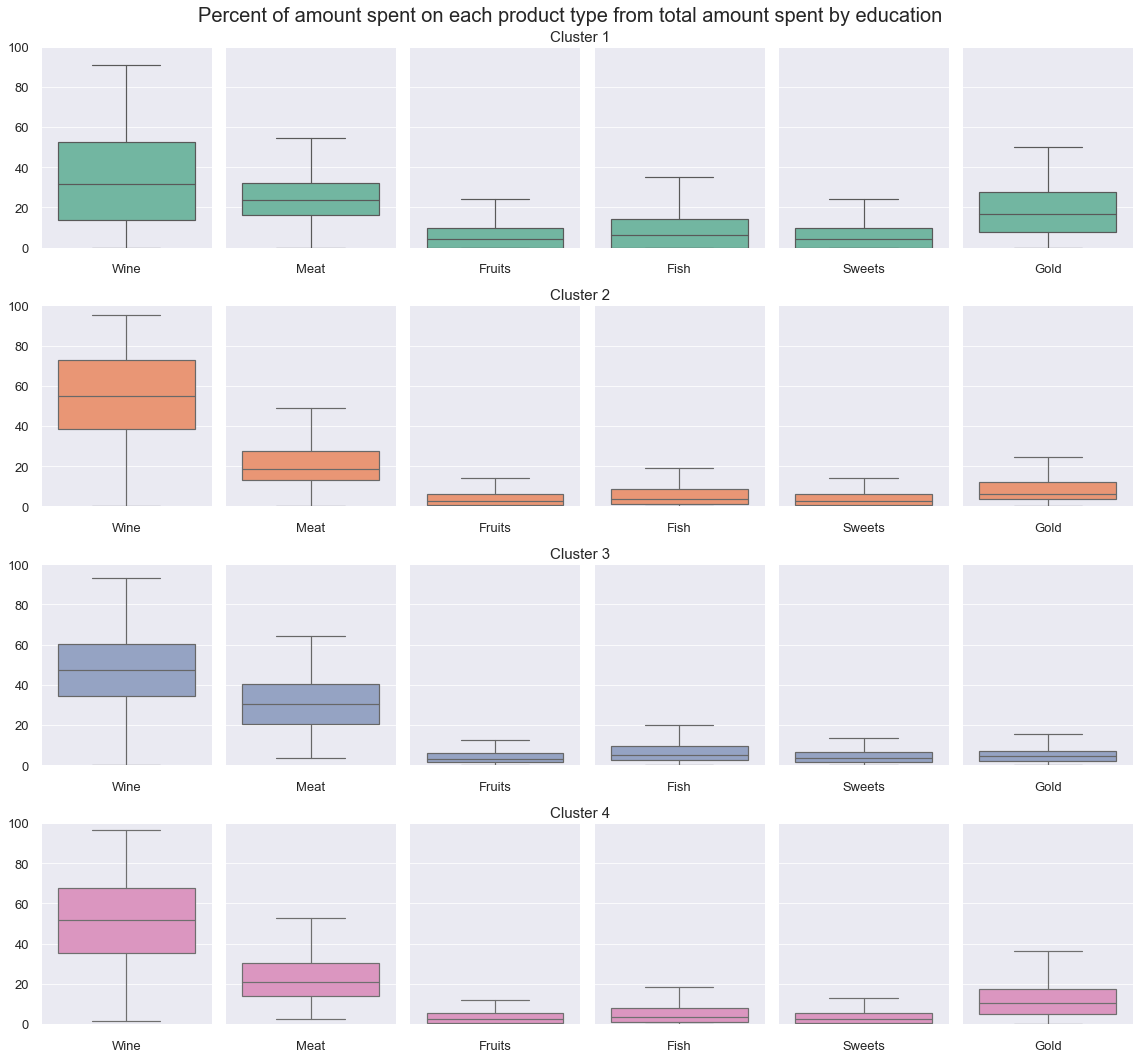

In [101]:
fig, axes = plt.subplots(4, 6, figsize=(16, 15), sharey=True)
fig.suptitle('Percent of amount spent on each product type from total amount spent by education', fontsize=20)

for i, value in enumerate(sorted(data_clustered['Cluster'].unique())):
    sns.boxplot(data=data_clustered.query(f'Cluster == {value}'), y='percentWines', showfliers=False, color=PALETTE[i], ax=axes[i, 0])
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].set_xlabel('Wine')
    axes[i, 0].set_ylabel('')
    
    sns.boxplot(data=data_clustered.query(f'Cluster == {value}'), y='percentMeat', showfliers=False, color=PALETTE[i], ax=axes[i, 1])
    axes[i, 1].set_xlabel('Meat')
    axes[i, 1].set_ylabel('')
    
    sns.boxplot(data=data_clustered.query(f'Cluster == {value}'), y='percentFruits', showfliers=False, color=PALETTE[i], ax=axes[i, 2])
    axes[i, 2].set_xlabel('Fruits')
    axes[i, 2].set_ylabel('')
    axes[i, 2].set_title(f'Cluster {value}', x=1)
    
    sns.boxplot(data=data_clustered.query(f'Cluster == {value}'), y='percentFish', showfliers=False, color=PALETTE[i], ax=axes[i, 3])
    axes[i, 3].set_xlabel('Fish')
    axes[i, 3].set_ylabel('')
    
    sns.boxplot(data=data_clustered.query(f'Cluster == {value}'), y='percentSweets', showfliers=False, color=PALETTE[i], ax=axes[i, 4])
    axes[i, 4].set_xlabel('Sweets')
    axes[i, 4].set_ylabel('')
    
    sns.boxplot(data=data_clustered.query(f'Cluster == {value}'), y='percentGold', showfliers=False, color=PALETTE[i], ax=axes[i, 5])
    axes[i, 5].set_xlabel('Gold')
    axes[i, 5].set_ylabel('')
    
plt.tight_layout()

As we see, popular products types are the same in all clusters: wine and meat. But cluster 3 buys Meat more than others. Cluster 1 buy  buy Gold products in addition to Wine and Meat

## Accepted Campaigns

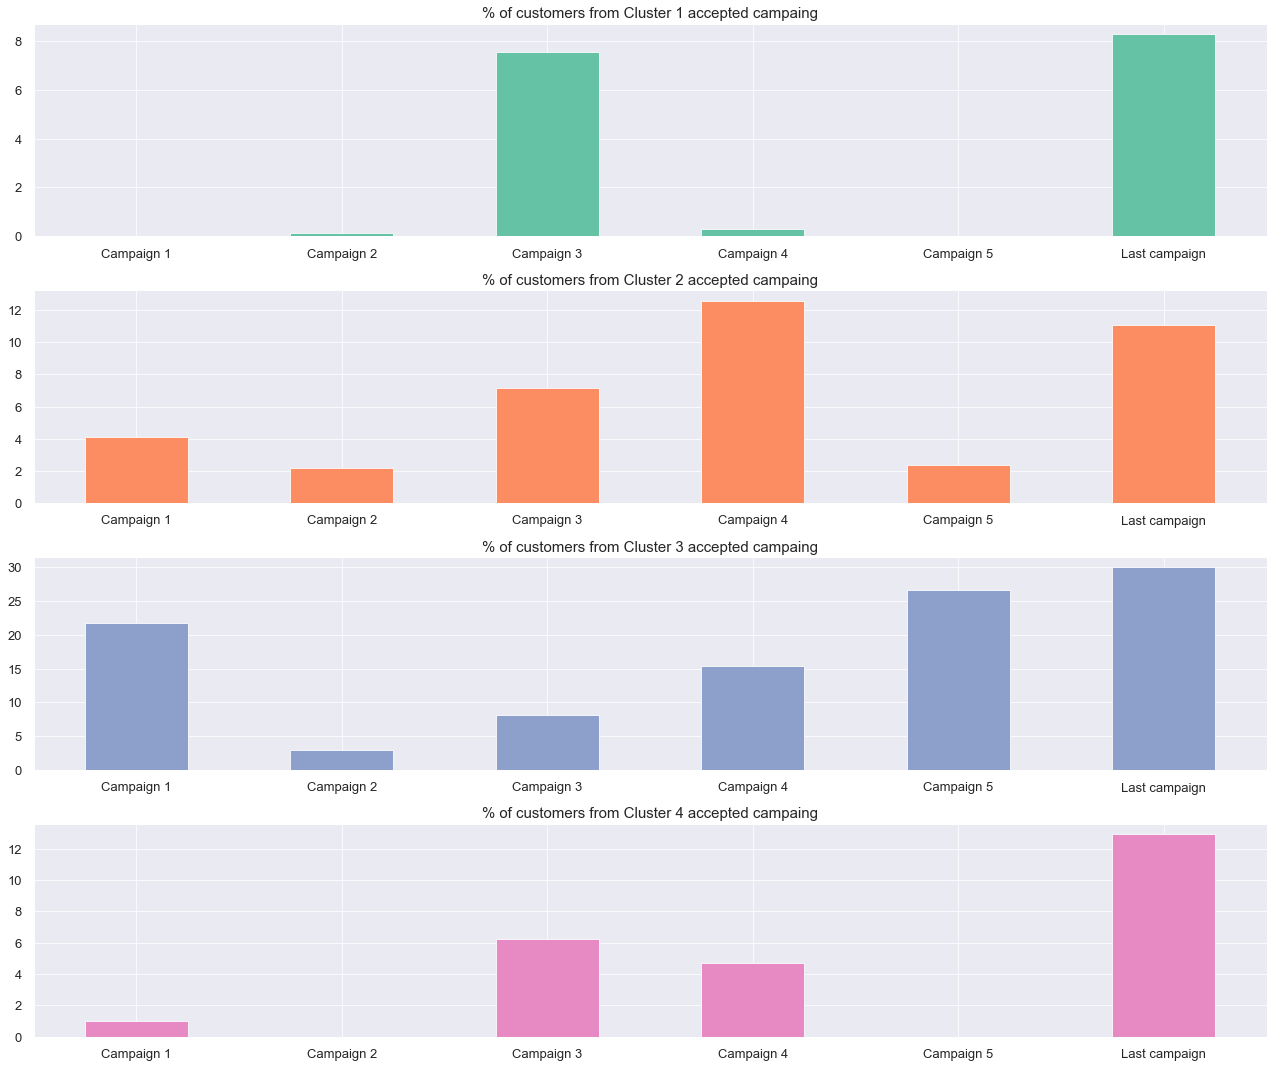

In [102]:
fig, axes = plt.subplots(4, 1, figsize=(16, 20))

for i in range(1, 5):
    ax = (data_clustered.query(f'Cluster == {i}')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
          .sum() 
          .divide(data_clustered.query(f'Cluster == {i}').shape[0]).multiply(100)
          .plot(kind='bar', figsize=(18,15), title=f'% of customers from Cluster {i} accepted campaing', ax=axes[i-1], color=PALETTE[i-1]))
    ax.set_xticklabels(['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last campaign'], rotation=0)
    
plt.tight_layout()

We see that:

- The biggest interest in campaign 1 showed Cluster 2 and 3
- Campaign 2 acceptance in relatively low in any cluster
- The biggest interest in campaign 3 showed Cluster 1
- Campaign 4 was relatively successful in all clusters besides Cluster 1
- The biggest interest in campaign 5 showed Cluster 3
- The last campaign was succesfull in all clusters

## Complains

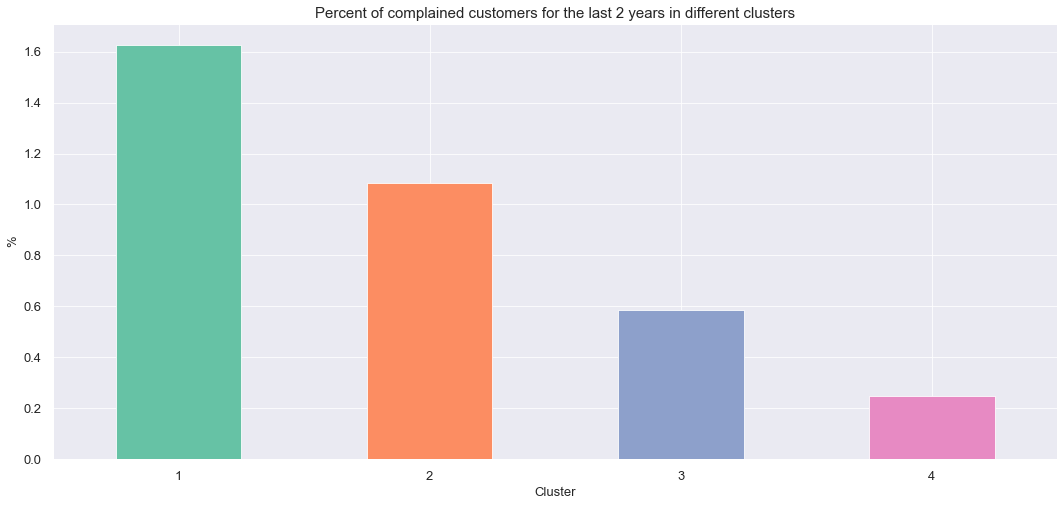

In [112]:
complains_by_cluster = (data_clustered.groupby(by='Cluster')['Complain'].sum()
                                      .divide(data_clustered['Cluster'].value_counts())
                                      .multiply(100))

ax = complains_by_cluster.plot(kind='bar', figsize=(18, 8), color=PALETTE[:4], 
                               title='Percent of complained customers for the last 2 years in different clusters',
                               ylabel='%', xlabel='Cluster')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

Cluster 1 purchases less, but complains more, thats interesting

# Results

I would rate clusters as follow:
- Cluster 1 -> __Bronze__ customers
- Cluster 4 -> __Silver__ customers
- Cluster 2 -> __Gold__ customers
- Cluster 3 -> __Platinum__ customers

__Platinum customers:__
- Very high income
- Very high average check
- Frequent buyers
- Mostly single
- Mostly buy from: store and catalog, but the website is also good
- The most successful campaigns: 1, 5, the last
- The least successful campaigns: 2
- Rarely visit the site

__Gold customers:__
- High income
- High average check
- Frequent buyers
- 80% are parents
- Mostly buy from: store and website
- The most successful campaigns: 4, the last
- The least successful campaigns: 2, 5

__Silver customers:__
- Medium income
- Medium average check
- Medium frequency buyers
- Mostly parents
- Mostly buy from: store and website
- The most successful campaigns: 3, the last
- The least successful campaigns: 1, 2, 5 (0 acceptance in 2 and 5 campaigns)

__Bronze customers:__
- Low income
- Low average check
- Low frequency buyers
- Mostly parents
- There some undergraduates in this cluster
- Mostly buy from: store and website
- Visit the site the most
- The most successful campaigns: 3, the last
- The least successful campaigns: 1, 2, 4, 5 (0 acceptance in 2 and 5 campaigns)
- Complain the most

Aquired skills:
- Tried clustering for the first time
- Known more about KMeans, KModes, KPrototypes
- Learned some metrics for clustering
- And again, some visuals were hard to plot, now i can deal with them